# Import 

In [1]:
# STANDARD PACKAGES
import pandas as pd
import numpy as np
from matplotlib import rc
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns
import re	
from datetime import datetime as dt
import time
import json
import random
from tqdm import tqdm #https://pypi.org/project/tqdm/#ipython-jupyter-integ½ration
from functools import reduce
import pickle
import itertools
#import geopandas as gpd


# SCRAPE PACKAGES
import requests
from bs4 import BeautifulSoup
# from pytrends.request import TrendReq #pip install pytrends

# MODEL PACKAGES
    #SKLEARN
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from statsmodels.tsa.x13 import x13_arima_analysis as x13
from scipy.stats import gaussian_kde

# CUSTOM FUNCTIONS
import os
import sys
currentdir = os.path.dirname(os.path.realpath('merge_DK'))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from func import (chunks, reindex, global_id, term_list, time_corr_plot, rmse, time_variable_plot, find_highest_corr, test_train_split,
                  bootstrap_all_windows, bootstrap_n_samples, bootstrap_sample, final_model, final_model_boot,
                  ar_1, grid_bestpar, tuning_window, tuning_window_bestpar, model_tuning, seasadj, GT_dict, abs_percentage_change)




# Initial descriptives

## Google trends and job sector

In [2]:
#imports
df_DK = pd.read_csv('data/df_DK.csv', parse_dates=['date'])
GT_dict = GT_dict()

In [3]:
df_DK

,date,target_actual,ID,target_lag,jobs,sector_information_technology,sector_engineering_technology,sector_management_staff,sector_trade_service,sector_industry_craft,...,GT_DK_12,GT_DK_13,GT_DK_14,GT_DK_15,GT_DK_16,GT_DK_17,GT_DK_18,GT_DK_19,GT_DK_20,GT_DK_21
0,2007-02-01,4.8,Capital,4.9,1.260650,0.088754,0.089670,0.126546,0.184036,0.122309,...,29.35,46.46,62.0,18.0,24.0,32.0,15.0,79.0,9.0,18.0
1,2007-03-01,4.6,Capital,4.8,1.477047,0.100425,0.110088,0.136776,0.225928,0.150005,...,43.48,20.20,44.0,20.0,21.0,54.0,16.0,85.0,6.0,22.0
2,2007-04-01,4.3,Capital,4.6,1.369270,0.081074,0.102986,0.146464,0.210355,0.138738,...,13.04,38.38,72.0,19.0,0.0,59.0,25.0,99.0,10.0,36.0
3,2007-05-01,4.3,Capital,4.3,1.407431,0.080941,0.111567,0.144036,0.218530,0.144151,...,23.91,39.39,35.0,19.0,20.0,51.0,21.0,76.0,10.0,10.0
4,2007-06-01,4.1,Capital,4.3,1.342219,0.078108,0.107819,0.113041,0.208325,0.150760,...,16.30,43.43,33.0,21.0,0.0,43.0,30.0,89.0,9.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2019-05-01,3.4,Zealand,3.5,0.707490,0.022423,0.042784,0.075775,0.093817,0.092012,...,25.00,3.03,27.0,15.0,31.0,36.0,20.0,49.0,21.0,31.0
756,2019-06-01,3.4,Zealand,3.4,0.593455,0.015916,0.039917,0.052802,0.096004,0.093983,...,15.22,6.06,24.0,11.0,15.0,40.0,24.0,54.0,32.0,11.0
757,2019-07-01,3.2,Zealand,3.4,0.566008,0.017455,0.044151,0.061350,0.069050,0.094206,...,17.39,7.07,26.0,7.0,11.0,31.0,16.0,45.0,21.0,13.0
758,2019-08-01,3.3,Zealand,3.2,0.637702,0.024637,0.040975,0.070020,0.089470,0.101659,...,27.17,4.04,24.0,10.0,9.0,39.0,23.0,51.0,24.0,13.0


### Sample test correlation plots

https://matplotlib.org/gallery/api/two_scales.html

In [4]:
filter_DK = [col for col in df_DK if col.startswith('GT_DK')]

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


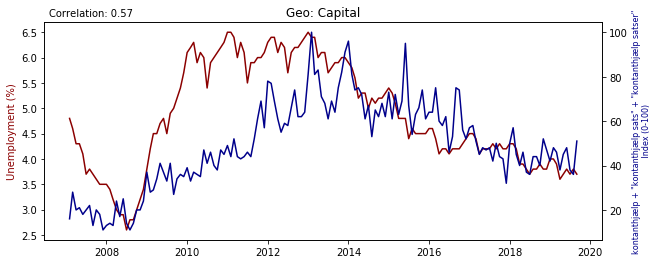

In [5]:
time_corr_plot(df = df_DK, var_list = filter_DK[0:1], target = 'target_actual',  geo = 'Capital', ylabel1 = 'Unemployment (%)', ylabel2 = '\n Index (0-100)', GT = True)
# plt.savefig("results/descriptives/corr_gt_1.pdf", bbox_inches='tight', encoding='utf-8-sig')

### Correlation tables for each region

In [6]:
#Empty container
df = {}

In [7]:
# df_DK = df_DK[df_DK['date'] >= pd.Timestamp('2012-01-01')].copy()

In [8]:
#Overall correlations
df_corr = df_DK.corr()[['target_actual']]

#corr col for names of cols - append with _season if needed
corr_col = ['target_actual']

In [9]:
#Within geo correlations
for geo in df_DK['ID'].unique():
    df[geo] = df_DK[df_DK['ID']==geo].corr()[['target_actual']].rename(index = str,
                                                                                            columns = {'target_actual' : 'target_actual_'+str(geo)})
    df_corr[['target_actual_'+str(geo)]] = df[geo][['target_actual_'+str(geo)]]
    
    #Appending corr_col list for col names
    corr_col.append('target_actual_'+str(geo))

In [10]:
#Dropping unneeded corr between targets
df_corr.drop(['target_actual'], axis = 0, inplace=True)

### Correlation heatmap

https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

https://www.kaggle.com/drazen/heatmap-with-sized-markers

https://github.com/drazenz/heatmap

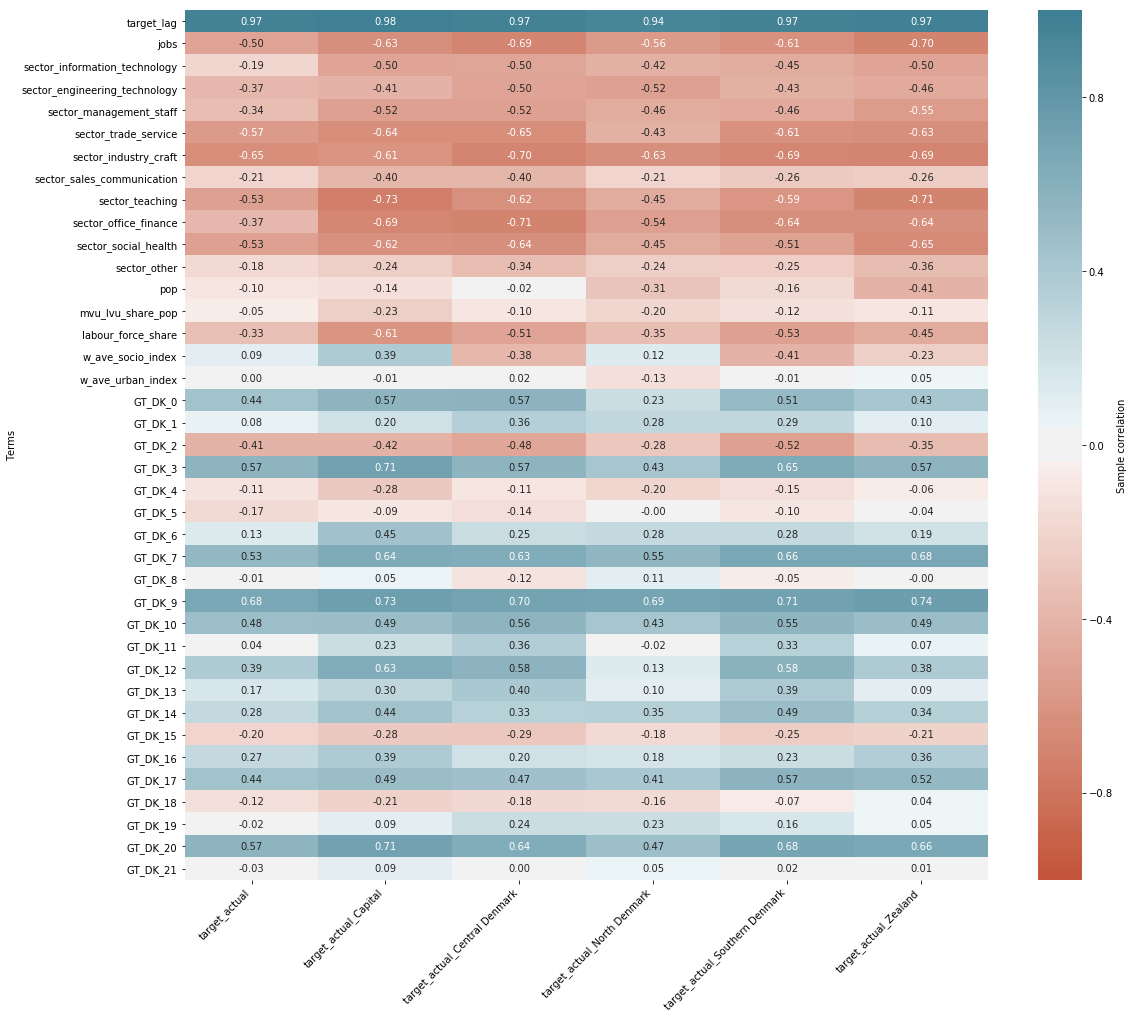

In [11]:
plt.figure(figsize=(18,16))
ax = sns.heatmap(df_corr[corr_col], vmin = -1, vmax = 1, center = 0,
            cmap = sns.diverging_palette(20, 220, n=200),
           square = False, annot=True, fmt='.2f',
                cbar_kws={'label': 'Sample correlation'})

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Terms')
plt.show()

### Drop list for GT variables

In [12]:
GT_select = df_corr[['target_actual_Capital', 'target_actual_Central Denmark', 'target_actual_North Denmark','target_actual_Southern Denmark', 'target_actual_Zealand']]

In [13]:
keep_list = []
drop_list = []

for GT in filter_DK:
    if (abs(GT_select.loc[GT].mean())>=0.35):
        keep_list.append(GT)
    else:
        drop_list.append(GT)

In [ ]:
print(keep_list)

In [ ]:
print(drop_list)

In [ ]:
for GT in filter_DK:
    print(GT + ': '+ GT_dict[GT] + ' : ' + str(round(GT_select.loc[GT].mean(), 2)))

### Drop list for sector variables

In [ ]:
job_select = df_corr[['target_actual_Capital', 'target_actual_Central Denmark', 'target_actual_North Denmark','target_actual_Southern Denmark', 'target_actual_Zealand']]

In [ ]:
job_vars = ['jobs',
       'sector_information_technology', 'sector_engineering_technology',
       'sector_management_staff', 'sector_trade_service',
       'sector_industry_craft', 'sector_sales_communication',
       'sector_teaching', 'sector_office_finance', 'sector_social_health',
       'sector_other']

In [ ]:
keep_list = []
drop_list = []

for job_var in job_vars:
    if (abs(GT_select.loc[job_var].mean())>=0.35):
        keep_list.append(job_var)
    else:
        drop_list.append(job_var)

In [ ]:
print(keep_list)

In [ ]:
print(drop_list)

In [ ]:
for job_var in job_vars:
    print(job_var + ' : ' + str(round(job_select.loc[job_var].mean(), 2)))

## First-difference in target

In [ ]:
#First difference
df_DK['target_diff'] = df_DK.groupby('ID')['target_actual'].diff()

### Diff-level

In [ ]:
filter_DK = [col for col in df_DK if col.startswith('GT_DK')]

In [ ]:
time_corr_plot(df = df_DK, var_list = filter_DK[0:1], target = 'target_diff',  geo = 'Capital', ylabel1 = 'Unemployment (%)', ylabel2 = '\n Index (0-100)', GT = False)
# plt.savefig("results/descriptives/corr_gt_1.pdf", bbox_inches='tight', encoding='utf-8-sig')

### Diff-diff

In [ ]:
filter_DK_diff = []

In [ ]:
for i in filter_DK:
    filter_DK_diff.append(i+'_diff')
    df_DK[i+'_diff'] = df_DK.groupby('ID')[i].diff()

In [ ]:
df_DK.columns

In [ ]:
time_corr_plot(df = df_DK, var_list = filter_DK_diff[:], target = 'target_diff',  geo = 'Capital', ylabel1 = 'Unemployment (%)', ylabel2 = '\n Index (0-100)')
# plt.savefig("results/descriptives/corr_gt_1.pdf", bbox_inches='tight', encoding='utf-8-sig')

### Correlation tables for each region

In [ ]:
#Empty container
df = {}

In [ ]:
#Overall correlations
df_corr = df_DK.corr()[['target_diff']]

#corr col for names of cols - append with _season if needed
corr_col = ['target_diff']

In [ ]:
#Within geo correlations
for geo in df_DK['ID'].unique():
    df[geo] = df_DK[df_DK['ID']==geo].corr()[['target_diff']].rename(index = str,
                                                                                            columns = {'target_diff' : 'target_diff_'+str(geo)})
    df_corr[['target_diff_'+str(geo)]] = df[geo][['target_diff_'+str(geo)]]
    
    #Appending corr_col list for col names
    corr_col.append('target_diff_'+str(geo))

In [ ]:
#Dropping unneeded corr between targets
df_corr.drop(['target_diff'], axis = 0, inplace=True)

### Correlation heatmap

https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

https://www.kaggle.com/drazen/heatmap-with-sized-markers

https://github.com/drazenz/heatmap

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.heatmap(df_corr[corr_col], vmin = -1, vmax = 1, center = 0,
            cmap = sns.diverging_palette(20, 220, n=200),
           square = False, annot=True, fmt='.2f',
                cbar_kws={'label': 'Sample correlation'})

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Terms')
plt.show()

# Report figures

https://stackoverflow.com/questions/17958485/matplotlib-not-using-latex-font-while-text-usetex-true

In [4]:
df_DK = pd.read_csv('data/df_DK.csv', parse_dates=['date'])

#LATEX PRINTING

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size' : 14})
rc('text', usetex=True)
rc('legend',fontsize=13)

#Colors 
#color_rgb = [(0.26, 0.33, 0.41), (0.33, 0.33, 0.33), (0.00, 0.47, 0.53), (0.13, 0.50, 0.36), (0.54, 0.23, 0.23)]
#color_rgb = [(0, 0.59, 0.66),(0.26, 0.33, 0.41), (0.13, 0.50, 0.36), (0.717, 0.760, 0.819), (0.54, 0.23, 0.23)]
#color_rgb = [(0.26, 0.33, 0.41), (0.713, 0.882, 0.90), (0.54, 0.23, 0.23), (0.13, 0.50, 0.36), (0.717, 0.760, 0.819)]
color_rgb = [(0.26, 0.33, 0.41), (0.00, 0.47, 0.53),(0.65, 0.65, 0.65),  (0.13, 0.50, 0.36), (0.54, 0.23, 0.23)]

linewidth = 1.5

In [5]:
df_DK.shape

(760, 42)

In [6]:
df_DK['date'].unique().shape

(152,)

## Regional characteristics table

In [7]:
df_DK.columns

Index(['date', 'target_actual', 'ID', 'target_lag', 'jobs',
       'sector_information_technology', 'sector_engineering_technology',
       'sector_management_staff', 'sector_trade_service',
       'sector_industry_craft', 'sector_sales_communication',
       'sector_teaching', 'sector_office_finance', 'sector_social_health',
       'sector_other', 'pop', 'mvu_lvu_share_pop', 'labour_force_share',
       'w_ave_socio_index', 'w_ave_urban_index', 'GT_DK_0', 'GT_DK_1',
       'GT_DK_2', 'GT_DK_3', 'GT_DK_4', 'GT_DK_5', 'GT_DK_6', 'GT_DK_7',
       'GT_DK_8', 'GT_DK_9', 'GT_DK_10', 'GT_DK_11', 'GT_DK_12', 'GT_DK_13',
       'GT_DK_14', 'GT_DK_15', 'GT_DK_16', 'GT_DK_17', 'GT_DK_18', 'GT_DK_19',
       'GT_DK_20', 'GT_DK_21'],
      dtype='object')

In [8]:
filter_region = ['target_actual', 'pop', 'mvu_lvu_share_pop', 'labour_force_share', 'w_ave_urban_index']

In [9]:
df_DK['date'].min()

Timestamp('2007-02-01 00:00:00')

In [10]:
df_DK[filter_region].mean().round(2).reset_index()

,index,0
0,target_actual,4.69
1,pop,1124679.28
2,mvu_lvu_share_pop,14.98
3,labour_force_share,48.07
4,w_ave_urban_index,85.26


In [11]:
df_DK[filter_region].std().round(2).reset_index()

,index,0
0,target_actual,1.21
1,pop,398777.34
2,mvu_lvu_share_pop,3.54
3,labour_force_share,2.05
4,w_ave_urban_index,6.32


In [12]:
df_DK.groupby('ID')[filter_region].mean().round(2).reset_index()

,ID,target_actual,pop,mvu_lvu_share_pop,labour_force_share,w_ave_urban_index
0,Capital,4.84,1737053.38,21.26,50.72,97.43
1,Central Denmark,4.14,1274866.72,15.08,48.84,84.54
2,North Denmark,5.14,582402.99,12.99,47.27,80.38
3,Southern Denmark,4.67,1205761.51,13.16,46.84,83.33
4,Zealand,4.68,823311.81,12.39,46.69,80.63


In [12]:
print(df_DK.groupby('ID')[filter_region].mean().round(2).reset_index().to_latex(index = False))

\begin{tabular}{lrrrrr}
\toprule
               ID &  target\_actual &         pop &  mvu\_lvu\_share\_pop &  labour\_force\_share &  w\_ave\_urban\_index \\
\midrule
          Capital &           4.84 &  1737053.38 &              21.26 &               50.72 &              97.43 \\
  Central Denmark &           4.14 &  1274866.72 &              15.08 &               48.84 &              84.54 \\
    North Denmark &           5.14 &   582402.99 &              12.99 &               47.27 &              80.38 \\
 Southern Denmark &           4.67 &  1205761.51 &              13.16 &               46.84 &              83.33 \\
          Zealand &           4.68 &   823311.81 &              12.39 &               46.69 &              80.63 \\
\bottomrule
\end{tabular}



In [13]:
# df_DK.groupby('ID')[['GT_DK_1_cross',
#        'GT_DK_2_cross', 'GT_DK_3_cross', 'GT_DK_4_cross', 'GT_DK_5_cross',
#        'GT_DK_6_cross', 'GT_DK_7_cross', 'GT_DK_8_cross', 'GT_DK_9_cross',
#        'GT_DK_10_cross', 'GT_DK_11_cross', 'GT_DK_12_cross', 'GT_DK_13_cross',
#        'GT_DK_14_cross', 'GT_DK_15_cross', 'GT_DK_16_cross', 'GT_DK_17_cross',
#        'GT_DK_18_cross', 'GT_DK_19_cross', 'GT_DK_20_cross', 'GT_DK_21_cross']].mean().round(1)

## Regional UE over time plots (single plot)

In [14]:
# df_DK = df_DK[df_DK['date'] >= pd.Timestamp('2012-01-01')].copy()

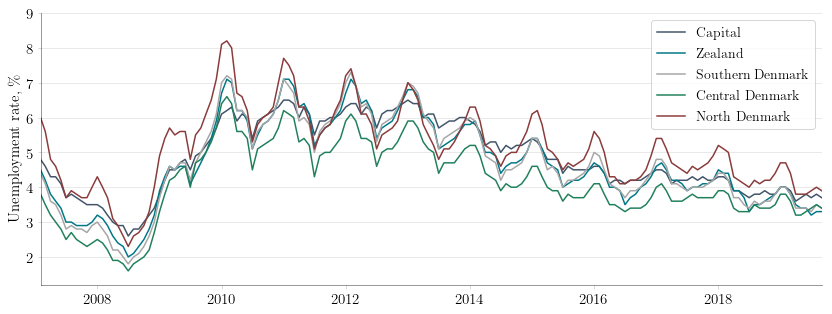

In [16]:
fig, ax = plt.subplots(figsize = (14,5))
#CAPITAL
ax.plot((df_DK[['target_actual', 'date']][df_DK['ID']=='Capital'].set_index('date')), color = color_rgb[0], label = 'Capital',
       linewidth = linewidth)

#ZEALAND
ax.plot((df_DK[['target_actual', 'date']][df_DK['ID']=='Zealand'].set_index('date')), color = color_rgb[1], label = 'Zealand',
       linewidth = linewidth)

#SOUTH
ax.plot((df_DK[['target_actual', 'date']][df_DK['ID']=='Southern Denmark'].set_index('date')), color = color_rgb[2], label = 'Southern Denmark',
       linewidth = linewidth)

#CENTRAL
ax.plot((df_DK[['target_actual', 'date']][df_DK['ID']=='Central Denmark'].set_index('date')), color = color_rgb[3], label = 'Central Denmark',
       linewidth = linewidth)

#NORTH
ax.plot((df_DK[['target_actual', 'date']][df_DK['ID']=='North Denmark'].set_index('date')), color = color_rgb[4], label = 'North Denmark',
       linewidth = linewidth)

ax.legend(fancybox = True)

ax.set_ylabel('Unemployment rate, \%')

#Fixing box and grids
ax.grid(b = True, axis ='y', alpha=0.35)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.spines['left'].set_alpha(0.5)
ax.tick_params(axis='x', color = 'lightgrey')
ax.tick_params(axis='y', color = 'lightgrey')
ax.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax.set_ylim(1.2 ,9)

#Exporting
plt.savefig("report/4_data/4_ue_single_20072019.pdf", bbox_inches='tight', encoding='utf-8-sig')
plt.show()

In [16]:
df_DK[df_DK['date']==pd.Timestamp('2010-01-01')]

,date,target_actual,ID,target_lag,jobs,sector_information_technology,sector_engineering_technology,sector_management_staff,sector_trade_service,sector_industry_craft,...,GT_DK_12,GT_DK_13,GT_DK_14,GT_DK_15,GT_DK_16,GT_DK_17,GT_DK_18,GT_DK_19,GT_DK_20,GT_DK_21
35,2010-01-01,6.1,Capital,5.7,0.524448,0.038573,0.033383,0.062283,0.062518,0.020053,...,58.70,39.39,53.0,14.0,30.0,50.0,24.0,88.0,42.0,47.0
187,2010-01-01,6.4,Central Denmark,5.7,0.505860,0.020862,0.032344,0.061615,0.082962,0.031697,...,70.65,43.43,37.0,11.0,31.0,41.0,19.0,71.0,35.0,45.0
339,2010-01-01,8.1,North Denmark,7.1,0.421896,0.012653,0.020607,0.041213,0.075197,0.027114,...,52.17,19.19,31.0,8.0,31.0,41.0,17.0,43.0,30.0,22.0
491,2010-01-01,7.0,Southern Denmark,6.1,0.478024,0.007166,0.028489,0.049987,0.077602,0.029363,...,52.17,10.10,37.0,9.0,18.0,39.0,19.0,68.0,33.0,0.0
643,2010-01-01,6.7,Zealand,5.9,0.315869,0.005119,0.020990,0.040956,0.051962,0.022526,...,55.43,19.19,23.0,22.0,30.0,57.0,16.0,71.0,53.0,13.0


## Distribution of 1st differnce in target

In [21]:
df_DK['target_diff'] = df_DK.groupby('ID')['target_actual'].diff()

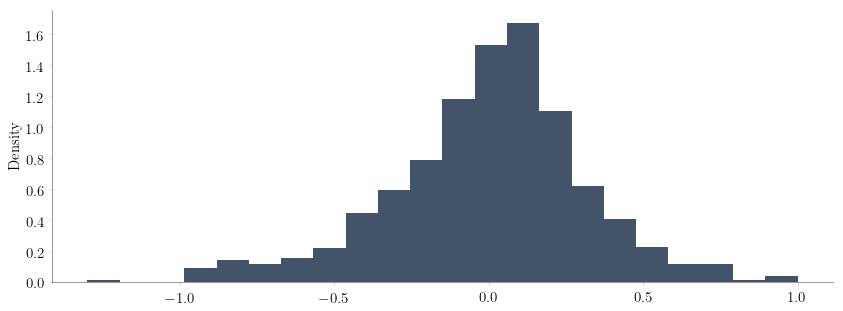

In [25]:
fig, ax = plt.subplots(figsize = (14,5))

density = gaussian_kde(df_DK['target_diff'].dropna())
xs = np.linspace(-1.5,1,200)

#plt.plot(xs,density(xs), linewidth = 1.5, color = color_rgb[0])
plt.hist(df_DK['target_diff'].dropna(), density = True, color = color_rgb[0], bins = 22)


ax.set_ylabel('Density')
#ax.set_xlabel('\%-points')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.spines['left'].set_alpha(0.5)
ax.tick_params(axis='x', color = 'lightgrey')
ax.tick_params(axis='y', color = 'lightgrey')

#Exporting
plt.savefig("report/4_data/4_1stdiff_dist.pdf", bbox_inches='tight', encoding='utf-8-sig')
plt.show()

In [107]:
df_DK['target_diff'].dropna().describe()

count    755.000000
mean      -0.007682
std        0.305379
min       -1.300000
25%       -0.200000
50%        0.000000
75%        0.200000
max        1.000000
Name: target_diff, dtype: float64

In [108]:
df_DK['target_diff'].round(1).value_counts().sort_values(ascending=False)/sum(df_DK['target_diff'].round(1).value_counts().sort_values(ascending=False))

 0.1    0.174834
 0.0    0.160265
-0.1    0.123179
 0.2    0.115232
-0.2    0.082119
 0.3    0.064901
-0.3    0.062252
-0.4    0.046358
 0.4    0.042384
 0.5    0.023841
-0.5    0.022517
-0.6    0.015894
-0.8    0.014570
-0.7    0.011921
 0.6    0.011921
 0.7    0.011921
-0.9    0.009272
 0.9    0.002649
 0.8    0.001325
-1.3    0.001325
 1.0    0.001325
Name: target_diff, dtype: float64

## Plots w/ GT

### 5 grid - GT_0: Cash benefits

In [144]:
GT = 'GT_DK_0'
ylabel = 'Unemployment rate, \%'


In [145]:
# GT_dict[GT]

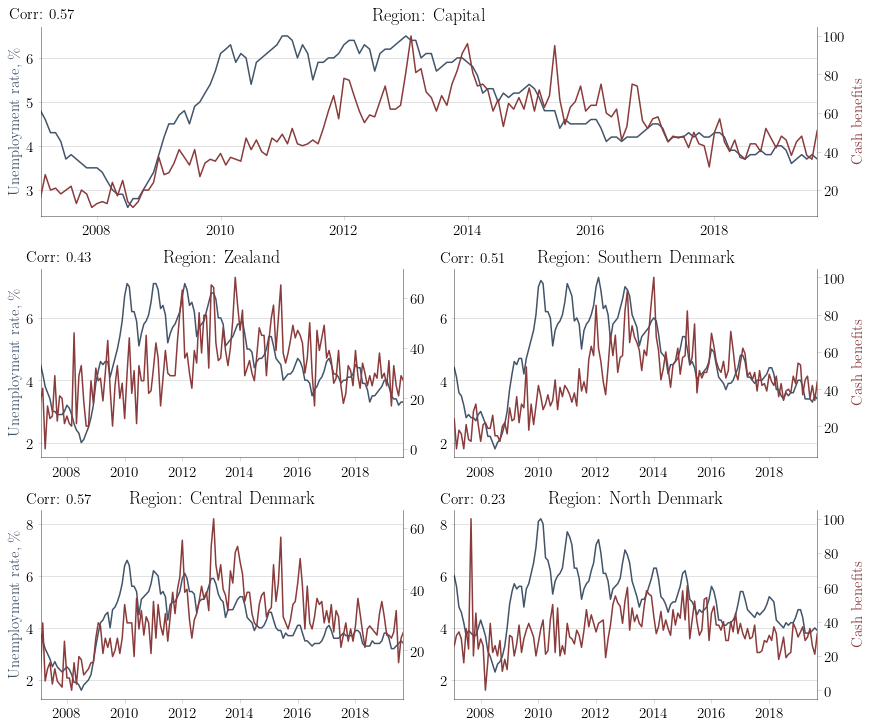

In [147]:
#Initilising entire fig and placements
fig = plt.figure(figsize=(12,10), constrained_layout = True)
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, :])

ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1], sharey = ax2)
# plt.setp(ax3.get_yticklabels(), visible=False)

ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1], sharey = ax4)
# plt.setp(ax5.get_yticklabels(), visible=False)

#SETTINGS
color_ue = color_rgb[0]
color_gt = color_rgb[-1]
ylabel2 = 'Cash benefits'

    #CAPITAL
geo = 'Capital'
ax1.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax1.set_ylabel(ylabel, color = color_ue)

ax1_GT = ax1.twinx()
ax1_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax1_GT.set_ylabel(ylabel2, color = color_gt)

ax1.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.06 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 
plt.title('Region: ' + geo)

#Fixing box and grids
ax1.grid(b = True, axis ='y', alpha=0.45)

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_alpha(0.5)
ax1.spines['left'].set_alpha(0.5)
ax1.spines['right'].set_visible(False)

ax1.tick_params(axis='x', color = 'lightgrey')
ax1.tick_params(axis='y', color = 'lightgrey')
ax1_GT.tick_params(axis='y', color = 'lightgrey')

ax1_GT.spines['top'].set_visible(False)
ax1_GT.spines['bottom'].set_visible(False)
ax1_GT.spines['left'].set_visible(False)
ax1_GT.spines['right'].set_alpha(0.5)


    #ZEALAND
geo = 'Zealand'
ax2.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax2.set_ylabel(ylabel, color = color_ue)

ax2_GT = ax2.twinx()
ax2_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
#ax2_GT.set_ylabel(ylabel2, color = color_gt)

ax2.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.1 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax2.grid(b = True, axis ='y', alpha=0.45)

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_alpha(0.5)
ax2.spines['left'].set_alpha(0.5)
ax2.spines['right'].set_visible(False)

ax2.tick_params(axis='x', color = 'lightgrey')
ax2.tick_params(axis='y', color = 'lightgrey')
ax2_GT.tick_params(axis='y', color = 'lightgrey')

ax2_GT.spines['top'].set_visible(False)
ax2_GT.spines['bottom'].set_visible(False)
ax2_GT.spines['left'].set_visible(False)
ax2_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #South
geo = 'Southern Denmark'
ax3.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
#ax3.set_ylabel(ylabel, color = color_ue)

ax3_GT = ax3.twinx()
ax3_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax3_GT.set_ylabel(ylabel2, color = color_gt)

ax3.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.065 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax3.grid(b = True, axis ='y', alpha=0.45)

ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_alpha(0.5)
ax3.spines['left'].set_alpha(0.5)
ax3.spines['right'].set_visible(False)

ax3.tick_params(axis='x', color = 'lightgrey')
ax3.tick_params(axis='y', color = 'lightgrey')
ax3_GT.tick_params(axis='y', color = 'lightgrey')

ax3_GT.spines['top'].set_visible(False)
ax3_GT.spines['bottom'].set_visible(False)
ax3_GT.spines['left'].set_visible(False)
ax3_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #CENTRAL
geo = 'Central Denmark'
ax4.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax4.set_ylabel(ylabel, color = color_ue)

ax4_GT = ax4.twinx()
ax4_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
#ax4_GT.set_ylabel(ylabel2, color = color_gt)

ax4.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.33 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax4.grid(b = True, axis ='y', alpha=0.45)

ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_alpha(0.5)
ax4.spines['left'].set_alpha(0.5)
ax4.spines['right'].set_visible(False)

ax4.tick_params(axis='x', color = 'lightgrey')
ax4.tick_params(axis='y', color = 'lightgrey')
ax4_GT.tick_params(axis='y', color = 'lightgrey')

ax4_GT.spines['top'].set_visible(False)
ax4_GT.spines['bottom'].set_visible(False)
ax4_GT.spines['left'].set_visible(False)
ax4_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)

    #NORTH
geo = 'North Denmark'
ax5.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
#ax5.set_ylabel(ylabel, color = color_ue)

ax5_GT = ax5.twinx()
ax5_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax5_GT.set_ylabel(ylabel2, color = color_gt)

ax5.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.07 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax5.grid(b = True, axis ='y', alpha=0.45)

ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_alpha(0.5)
ax5.spines['left'].set_alpha(0.5)
ax5.spines['right'].set_visible(False)

ax5.tick_params(axis='x', color = 'lightgrey')
ax5.tick_params(axis='y', color = 'lightgrey')
ax5_GT.tick_params(axis='y', color = 'lightgrey')

ax5_GT.spines['top'].set_visible(False)
ax5_GT.spines['bottom'].set_visible(False)
ax5_GT.spines['left'].set_visible(False)
ax5_GT.spines['right'].set_alpha(0.5)


ax1_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax2_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax3_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax4_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax5_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())

plt.title('Region: ' + geo)

#Exporting
plt.savefig("report/4_data/4_ue_grid_GT0.pdf", bbox_inches='tight', encoding='utf-8-sig')
plt.show()

### 5-grid - GT_3: Job center

In [33]:
GT = 'GT_DK_3'
ylabel = 'Unemployment rate, \%'


In [34]:
# GT_dict[GT]

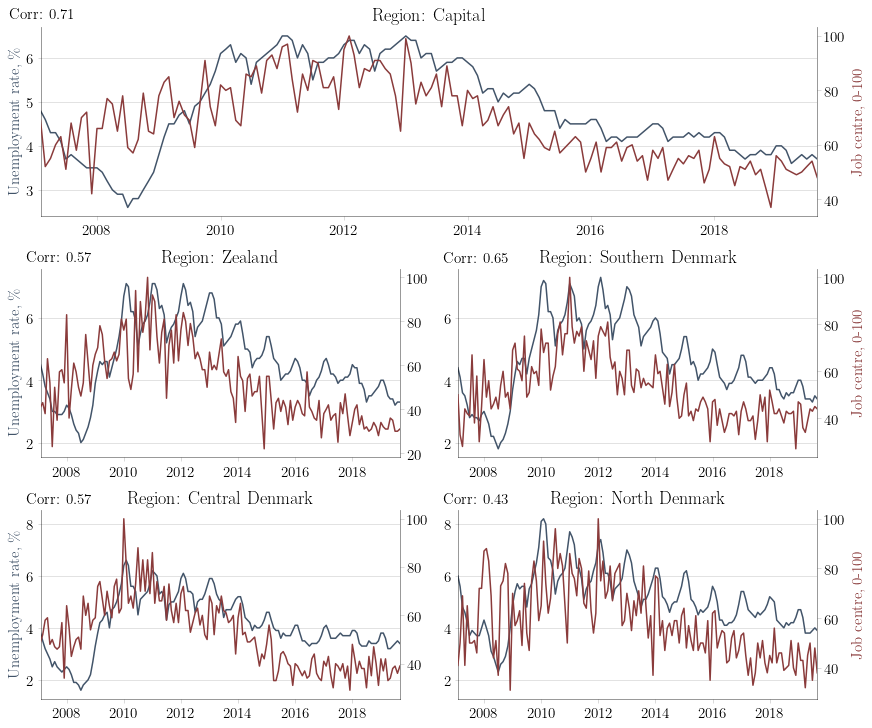

In [35]:
#Initilising entire fig and placements
fig = plt.figure(figsize=(12,10), constrained_layout = True)
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, :])

ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1], sharey = ax2)
# plt.setp(ax3.get_yticklabels(), visible=False)

ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1], sharey = ax4)
# plt.setp(ax5.get_yticklabels(), visible=False)

#SETTINGS
color_ue = color_rgb[0]
color_gt = color_rgb[-1]
ylabel2 = 'Job centre, 0-100'

    #CAPITAL
geo = 'Capital'
ax1.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax1.set_ylabel(ylabel, color = color_ue)

ax1_GT = ax1.twinx()
ax1_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax1_GT.set_ylabel(ylabel2, color = color_gt)

ax1.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.06 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 
plt.title('Region: ' + geo)

#Fixing box and grids
ax1.grid(b = True, axis ='y', alpha=0.45)

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_alpha(0.5)
ax1.spines['left'].set_alpha(0.5)
ax1.spines['right'].set_visible(False)

ax1.tick_params(axis='x', color = 'lightgrey')
ax1.tick_params(axis='y', color = 'lightgrey')
ax1_GT.tick_params(axis='y', color = 'lightgrey')

ax1_GT.spines['top'].set_visible(False)
ax1_GT.spines['bottom'].set_visible(False)
ax1_GT.spines['left'].set_visible(False)
ax1_GT.spines['right'].set_alpha(0.5)


    #ZEALAND
geo = 'Zealand'
ax2.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax2.set_ylabel(ylabel, color = color_ue)

ax2_GT = ax2.twinx()
ax2_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
#ax2_GT.set_ylabel(ylabel2, color = color_gt)

ax2.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.1 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax2.grid(b = True, axis ='y', alpha=0.45)

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_alpha(0.5)
ax2.spines['left'].set_alpha(0.5)
ax2.spines['right'].set_visible(False)

ax2.tick_params(axis='x', color = 'lightgrey')
ax2.tick_params(axis='y', color = 'lightgrey')
ax2_GT.tick_params(axis='y', color = 'lightgrey')

ax2_GT.spines['top'].set_visible(False)
ax2_GT.spines['bottom'].set_visible(False)
ax2_GT.spines['left'].set_visible(False)
ax2_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #South
geo = 'Southern Denmark'
ax3.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
#ax3.set_ylabel(ylabel, color = color_ue)

ax3_GT = ax3.twinx()
ax3_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax3_GT.set_ylabel(ylabel2, color = color_gt)

ax3.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.065 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax3.grid(b = True, axis ='y', alpha=0.45)

ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_alpha(0.5)
ax3.spines['left'].set_alpha(0.5)
ax3.spines['right'].set_visible(False)

ax3.tick_params(axis='x', color = 'lightgrey')
ax3.tick_params(axis='y', color = 'lightgrey')
ax3_GT.tick_params(axis='y', color = 'lightgrey')

ax3_GT.spines['top'].set_visible(False)
ax3_GT.spines['bottom'].set_visible(False)
ax3_GT.spines['left'].set_visible(False)
ax3_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #CENTRAL
geo = 'Central Denmark'
ax4.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax4.set_ylabel(ylabel, color = color_ue)

ax4_GT = ax4.twinx()
ax4_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
#ax4_GT.set_ylabel(ylabel2, color = color_gt)

ax4.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.33 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax4.grid(b = True, axis ='y', alpha=0.45)

ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_alpha(0.5)
ax4.spines['left'].set_alpha(0.5)
ax4.spines['right'].set_visible(False)

ax4.tick_params(axis='x', color = 'lightgrey')
ax4.tick_params(axis='y', color = 'lightgrey')
ax4_GT.tick_params(axis='y', color = 'lightgrey')

ax4_GT.spines['top'].set_visible(False)
ax4_GT.spines['bottom'].set_visible(False)
ax4_GT.spines['left'].set_visible(False)
ax4_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)

    #NORTH
geo = 'North Denmark'
ax5.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
#ax5.set_ylabel(ylabel, color = color_ue)

ax5_GT = ax5.twinx()
ax5_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax5_GT.set_ylabel(ylabel2, color = color_gt)

ax5.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.07 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax5.grid(b = True, axis ='y', alpha=0.45)

ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_alpha(0.5)
ax5.spines['left'].set_alpha(0.5)
ax5.spines['right'].set_visible(False)

ax5.tick_params(axis='x', color = 'lightgrey')
ax5.tick_params(axis='y', color = 'lightgrey')
ax5_GT.tick_params(axis='y', color = 'lightgrey')

ax5_GT.spines['top'].set_visible(False)
ax5_GT.spines['bottom'].set_visible(False)
ax5_GT.spines['left'].set_visible(False)
ax5_GT.spines['right'].set_alpha(0.5)

ax1_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax2_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax3_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax4_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax5_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())

plt.title('Region: ' + geo)

#Exporting
plt.savefig("report/4_data/4_ue_grid_GT3.pdf", bbox_inches='tight', encoding='utf-8-sig')
plt.show()

### 5-grid - GT_4: Open positions

In [154]:
GT = 'GT_DK_4'
ylabel = 'Unemployment rate, \%'


In [155]:
# GT_dict[GT]

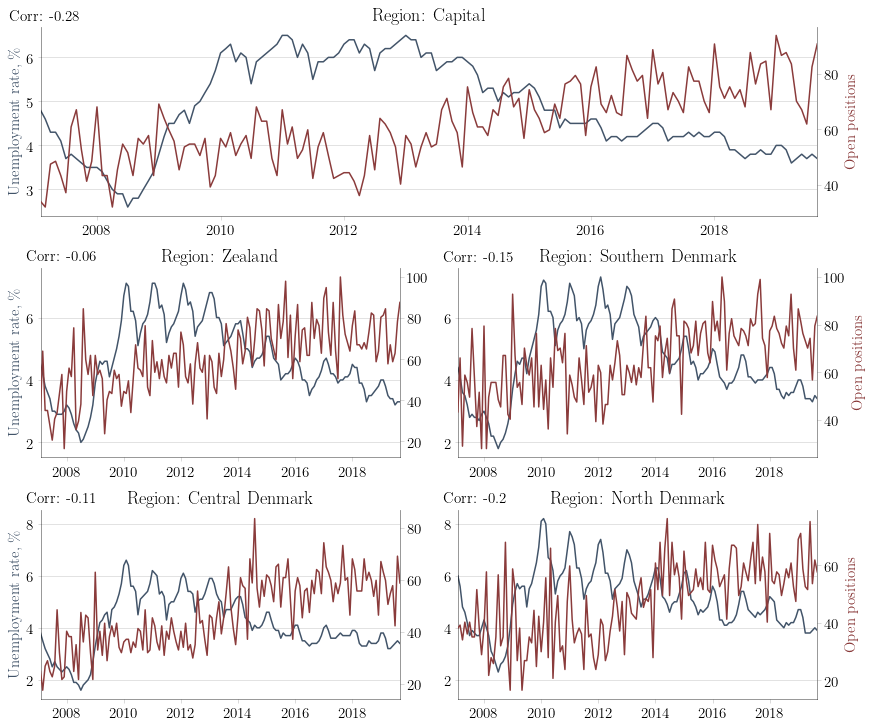

In [156]:
#Initilising entire fig and placements
fig = plt.figure(figsize=(12,10), constrained_layout = True)
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, :])

ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1], sharey = ax2)
# plt.setp(ax3.get_yticklabels(), visible=False)

ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1], sharey = ax4)
# plt.setp(ax5.get_yticklabels(), visible=False)

#SETTINGS
color_ue = color_rgb[0]
color_gt = color_rgb[-1]
ylabel2 = 'Open positions'

    #CAPITAL
geo = 'Capital'
ax1.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax1.set_ylabel(ylabel, color = color_ue)

ax1_GT = ax1.twinx()
ax1_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax1_GT.set_ylabel(ylabel2, color = color_gt)

ax1.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.05 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 
plt.title('Region: ' + geo)

#Fixing box and grids
ax1.grid(b = True, axis ='y', alpha=0.45)

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_alpha(0.5)
ax1.spines['left'].set_alpha(0.5)
ax1.spines['right'].set_visible(False)

ax1.tick_params(axis='x', color = 'lightgrey')
ax1.tick_params(axis='y', color = 'lightgrey')
ax1_GT.tick_params(axis='y', color = 'lightgrey')

ax1_GT.spines['top'].set_visible(False)
ax1_GT.spines['bottom'].set_visible(False)
ax1_GT.spines['left'].set_visible(False)
ax1_GT.spines['right'].set_alpha(0.5)


    #ZEALAND
geo = 'Zealand'
ax2.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax2.set_ylabel(ylabel, color = color_ue)

ax2_GT = ax2.twinx()
ax2_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
#ax2_GT.set_ylabel(ylabel2, color = color_gt)

ax2.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.1 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax2.grid(b = True, axis ='y', alpha=0.45)

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_alpha(0.5)
ax2.spines['left'].set_alpha(0.5)
ax2.spines['right'].set_visible(False)

ax2.tick_params(axis='x', color = 'lightgrey')
ax2.tick_params(axis='y', color = 'lightgrey')
ax2_GT.tick_params(axis='y', color = 'lightgrey')

ax2_GT.spines['top'].set_visible(False)
ax2_GT.spines['bottom'].set_visible(False)
ax2_GT.spines['left'].set_visible(False)
ax2_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #South
geo = 'Southern Denmark'
ax3.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
#ax3.set_ylabel(ylabel, color = color_ue)

ax3_GT = ax3.twinx()
ax3_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax3_GT.set_ylabel(ylabel2, color = color_gt)

ax3.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.068 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax3.grid(b = True, axis ='y', alpha=0.45)

ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_alpha(0.5)
ax3.spines['left'].set_alpha(0.5)
ax3.spines['right'].set_visible(False)

ax3.tick_params(axis='x', color = 'lightgrey')
ax3.tick_params(axis='y', color = 'lightgrey')
ax3_GT.tick_params(axis='y', color = 'lightgrey')

ax3_GT.spines['top'].set_visible(False)
ax3_GT.spines['bottom'].set_visible(False)
ax3_GT.spines['left'].set_visible(False)
ax3_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #CENTRAL
geo = 'Central Denmark'
ax4.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax4.set_ylabel(ylabel, color = color_ue)

ax4_GT = ax4.twinx()
ax4_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
#ax4_GT.set_ylabel(ylabel2, color = color_gt)

ax4.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.335 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax4.grid(b = True, axis ='y', alpha=0.45)

ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_alpha(0.5)
ax4.spines['left'].set_alpha(0.5)
ax4.spines['right'].set_visible(False)

ax4.tick_params(axis='x', color = 'lightgrey')
ax4.tick_params(axis='y', color = 'lightgrey')
ax4_GT.tick_params(axis='y', color = 'lightgrey')

ax4_GT.spines['top'].set_visible(False)
ax4_GT.spines['bottom'].set_visible(False)
ax4_GT.spines['left'].set_visible(False)
ax4_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)

    #NORTH
geo = 'North Denmark'
ax5.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
#ax5.set_ylabel(ylabel, color = color_ue)

ax5_GT = ax5.twinx()
ax5_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax5_GT.set_ylabel(ylabel2, color = color_gt)

ax5.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.075 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax5.grid(b = True, axis ='y', alpha=0.45)

ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_alpha(0.5)
ax5.spines['left'].set_alpha(0.5)
ax5.spines['right'].set_visible(False)

ax5.tick_params(axis='x', color = 'lightgrey')
ax5.tick_params(axis='y', color = 'lightgrey')
ax5_GT.tick_params(axis='y', color = 'lightgrey')

ax5_GT.spines['top'].set_visible(False)
ax5_GT.spines['bottom'].set_visible(False)
ax5_GT.spines['left'].set_visible(False)
ax5_GT.spines['right'].set_alpha(0.5)

ax1_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax2_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax3_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax4_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax5_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())

plt.title('Region: ' + geo)

#Exporting
plt.savefig("report/4_data/4_ue_grid_GT4.pdf", bbox_inches='tight', encoding='utf-8-sig')
plt.show()

### 5-grid - GT_9: Open positions

In [151]:
GT = 'GT_DK_9'
ylabel = 'Unemployment rate, \%'


In [152]:
# GT_dict[GT]

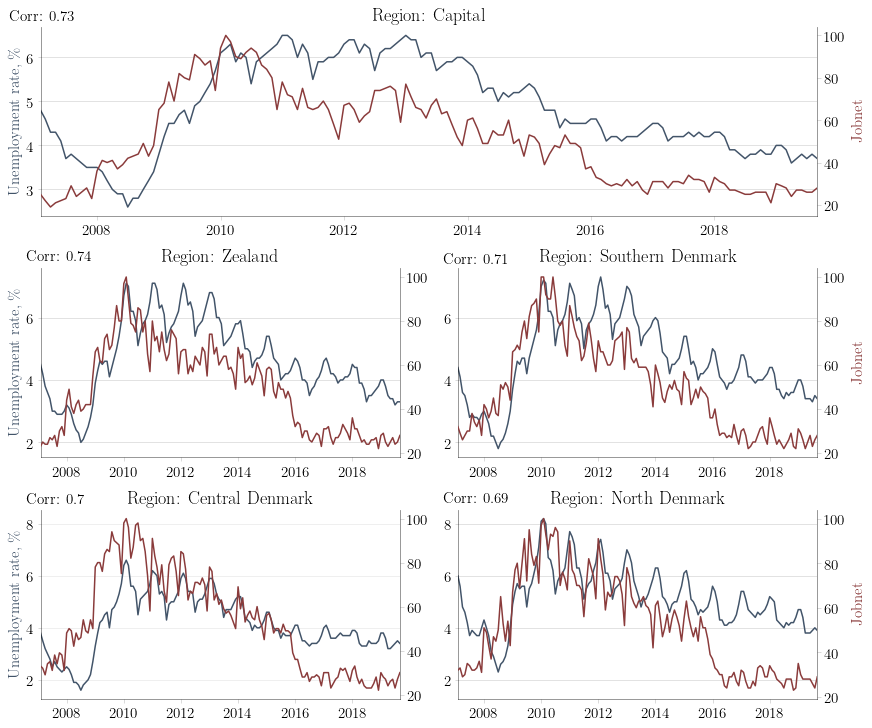

In [153]:
#Initilising entire fig and placements
fig = plt.figure(figsize=(12,10), constrained_layout = True)
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, :])

ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1], sharey = ax2)
# plt.setp(ax3.get_yticklabels(), visible=False)

ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1], sharey = ax4)
# plt.setp(ax5.get_yticklabels(), visible=False)

#SETTINGS
color_ue = color_rgb[0]
color_gt = color_rgb[-1]
ylabel2 = 'Jobnet'

    #CAPITAL
geo = 'Capital'
ax1.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax1.set_ylabel(ylabel, color = color_ue)

ax1_GT = ax1.twinx()
ax1_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax1_GT.set_ylabel(ylabel2, color = color_gt)

ax1.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.05 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 
plt.title('Region: ' + geo)

#Fixing box and grids
ax1.grid(b = True, axis ='y', alpha=0.45)

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_alpha(0.5)
ax1.spines['left'].set_alpha(0.5)
ax1.spines['right'].set_visible(False)

ax1.tick_params(axis='x', color = 'lightgrey')
ax1.tick_params(axis='y', color = 'lightgrey')
ax1_GT.tick_params(axis='y', color = 'lightgrey')

ax1_GT.spines['top'].set_visible(False)
ax1_GT.spines['bottom'].set_visible(False)
ax1_GT.spines['left'].set_visible(False)
ax1_GT.spines['right'].set_alpha(0.5)


    #ZEALAND
geo = 'Zealand'
ax2.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax2.set_ylabel(ylabel, color = color_ue)

ax2_GT = ax2.twinx()
ax2_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
#ax2_GT.set_ylabel(ylabel2, color = color_gt)

ax2.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.1 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax2.grid(b = True, axis ='y', alpha=0.45)

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_alpha(0.5)
ax2.spines['left'].set_alpha(0.5)
ax2.spines['right'].set_visible(False)

ax2.tick_params(axis='x', color = 'lightgrey')
ax2.tick_params(axis='y', color = 'lightgrey')
ax2_GT.tick_params(axis='y', color = 'lightgrey')

ax2_GT.spines['top'].set_visible(False)
ax2_GT.spines['bottom'].set_visible(False)
ax2_GT.spines['left'].set_visible(False)
ax2_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #South
geo = 'Southern Denmark'
ax3.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
#ax3.set_ylabel(ylabel, color = color_ue)

ax3_GT = ax3.twinx()
ax3_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax3_GT.set_ylabel(ylabel2, color = color_gt)

ax3.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.06 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax3.grid(b = True, axis ='y', alpha=0.45)

ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_alpha(0.5)
ax3.spines['left'].set_alpha(0.5)
ax3.spines['right'].set_visible(False)

ax3.tick_params(axis='x', color = 'lightgrey')
ax3.tick_params(axis='y', color = 'lightgrey')
ax3_GT.tick_params(axis='y', color = 'lightgrey')

ax3_GT.spines['top'].set_visible(False)
ax3_GT.spines['bottom'].set_visible(False)
ax3_GT.spines['left'].set_visible(False)
ax3_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #CENTRAL
geo = 'Central Denmark'
ax4.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax4.set_ylabel(ylabel, color = color_ue)

ax4_GT = ax4.twinx()
ax4_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
#ax4_GT.set_ylabel(ylabel2, color = color_gt)

ax4.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.33 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax4.grid(b = True, axis ='y', alpha=0.25)

ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_alpha(0.5)
ax4.spines['left'].set_alpha(0.5)
ax4.spines['right'].set_visible(False)

ax4.tick_params(axis='x', color = 'lightgrey')
ax4.tick_params(axis='y', color = 'lightgrey')
ax4_GT.tick_params(axis='y', color = 'lightgrey')

ax4_GT.spines['top'].set_visible(False)
ax4_GT.spines['bottom'].set_visible(False)
ax4_GT.spines['left'].set_visible(False)
ax4_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)

    #NORTH
geo = 'North Denmark'
ax5.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
#ax5.set_ylabel(ylabel, color = color_ue)

ax5_GT = ax5.twinx()
ax5_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax5_GT.set_ylabel(ylabel2, color = color_gt)

ax5.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.075 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax5.grid(b = True, axis ='y', alpha=0.45)

ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_alpha(0.5)
ax5.spines['left'].set_alpha(0.5)
ax5.spines['right'].set_visible(False)

ax5.tick_params(axis='x', color = 'lightgrey')
ax5.tick_params(axis='y', color = 'lightgrey')
ax5_GT.tick_params(axis='y', color = 'lightgrey')

ax5_GT.spines['top'].set_visible(False)
ax5_GT.spines['bottom'].set_visible(False)
ax5_GT.spines['left'].set_visible(False)
ax5_GT.spines['right'].set_alpha(0.5)

ax1_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax2_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax3_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax4_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax5_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())

plt.title('Region: ' + geo)

#Exporting
plt.savefig("report/4_data/4_ue_grid_GT9.pdf", bbox_inches='tight', encoding='utf-8-sig')
plt.show()

### 5-grid corr Plot with GT 1st PCA (?)

In [121]:
filter_GT = ['GT_DK_0', 'GT_DK_2', 'GT_DK_3', 'GT_DK_7', 'GT_DK_9', 'GT_DK_10', 'GT_DK_12', 'GT_DK_14', 'GT_DK_17', 'GT_DK_20']
geos = ['Capital', 'Central Denmark', 'North Denmark', 'Southern Denmark','Zealand']


df_dict_PCA = {}

for geo in geos:
    
    #Relevant GT cols
    temp = df_DK[df_DK['ID']==geo][filter_GT]
    
    #Creating PCA
    pca = PCA(n_components=0.95, random_state=1)
    GT_PCA = pca.fit_transform(temp)
    
    #PCAs into one dict
    df_dict_PCA[geo] = pd.DataFrame(GT_PCA).set_index(df_DK[df_DK['ID']==geo]['date'])

#Into DF   
df_PCA = pd.concat(df_dict_PCA).reset_index().rename({'level_0':'ID'}, axis = 1)
#Adding target
df_PCA = pd.merge(df_PCA, df_DK[['ID', 'date', 'target_actual']], on = ['ID', 'date'], how = 'left').copy()

#Which PCA TO plot
pca_plot = 0

In [122]:
df_PCA.to_csv('OLD/df_PCA.csv', sep = ';', encoding='utf-8-sig')

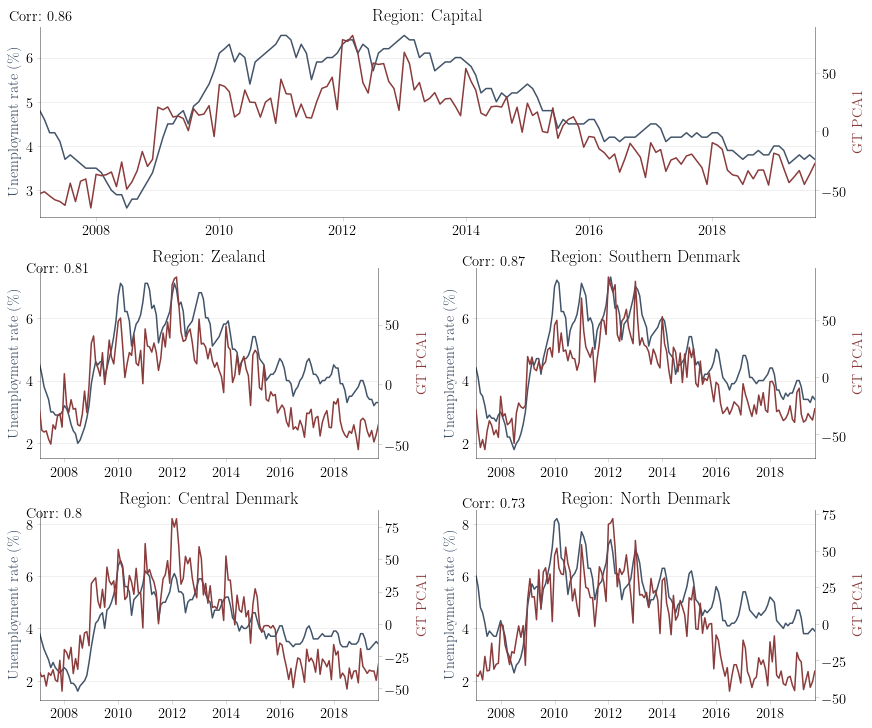

In [123]:
#Initilising entire fig and placements
fig = plt.figure(figsize=(12,10), constrained_layout = True)
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, :])

ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1], sharey = ax2)
# plt.setp(ax3.get_yticklabels(), visible=False)

ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1], sharey = ax4)
# plt.setp(ax5.get_yticklabels(), visible=False)

#SETTINGS
color_ue = color_rgb[0]
color_gt = color_rgb[-1]
ylabel2 = 'GT PCA1'

    #CAPITAL
geo = 'Capital'
ax1.plot((df_PCA[['target_actual', 'date']][df_PCA['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax1.set_ylabel(ylabel, color = color_ue)

ax1_GT = ax1.twinx()
ax1_GT.plot((df_PCA[[pca_plot, 'date']][df_PCA['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax1_GT.set_ylabel(ylabel2, color = color_gt)

ax1.text(x = pd.Timestamp("2006-08-01"), y = df_PCA[['target_actual', 'date']][df_PCA['ID']==geo]['target_actual'].max()*1.05 ,
                    s = 'Corr: ' + str(round(df_PCA[['target_actual', pca_plot]][df_PCA['ID']==geo].corr()['target_actual'][pca_plot], 2))) 
plt.title('Region: ' + geo)

#Fixing box and grids
ax1.grid(b = True, axis ='y', alpha=0.25)

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_alpha(0.5)
ax1.spines['left'].set_alpha(0.5)
ax1.spines['right'].set_visible(False)

ax1.tick_params(axis='x', color = 'lightgrey')
ax1.tick_params(axis='y', color = 'lightgrey')
ax1_GT.tick_params(axis='y', color = 'lightgrey')

ax1_GT.spines['top'].set_visible(False)
ax1_GT.spines['bottom'].set_visible(False)
ax1_GT.spines['left'].set_visible(False)
ax1_GT.spines['right'].set_alpha(0.5)


    #ZEALAND
geo = 'Zealand'
ax2.plot((df_PCA[['target_actual', 'date']][df_PCA['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax2.set_ylabel(ylabel, color = color_ue)

ax2_GT = ax2.twinx()
ax2_GT.plot((df_PCA[[pca_plot, 'date']][df_PCA['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax2_GT.set_ylabel(ylabel2, color = color_gt)

ax2.text(x = pd.Timestamp("2006-08-01"), y = df_PCA[['target_actual', 'date']][df_PCA['ID']==geo]['target_actual'].max()*1.05 ,
                    s = 'Corr: ' + str(round(df_PCA[['target_actual', pca_plot]][df_PCA['ID']==geo].corr()['target_actual'][pca_plot], 2))) 

#Fixing box and grids
ax2.grid(b = True, axis ='y', alpha=0.25)

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_alpha(0.5)
ax2.spines['left'].set_alpha(0.5)
ax2.spines['right'].set_visible(False)

ax2.tick_params(axis='x', color = 'lightgrey')
ax2.tick_params(axis='y', color = 'lightgrey')
ax2_GT.tick_params(axis='y', color = 'lightgrey')

ax2_GT.spines['top'].set_visible(False)
ax2_GT.spines['bottom'].set_visible(False)
ax2_GT.spines['left'].set_visible(False)
ax2_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #South
geo = 'Southern Denmark'
ax3.plot((df_PCA[['target_actual', 'date']][df_PCA['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax3.set_ylabel(ylabel, color = color_ue)

ax3_GT = ax3.twinx()
ax3_GT.plot((df_PCA[[pca_plot, 'date']][df_PCA['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax3_GT.set_ylabel(ylabel2, color = color_gt)

ax3.text(x = pd.Timestamp("2006-08-01"), y = df_PCA[['target_actual', 'date']][df_PCA['ID']==geo]['target_actual'].max()*1.05 ,
                    s = 'Corr: ' + str(round(df_PCA[['target_actual', pca_plot]][df_PCA['ID']==geo].corr()['target_actual'][pca_plot], 2))) 

#Fixing box and grids
ax3.grid(b = True, axis ='y', alpha=0.25)

ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_alpha(0.5)
ax3.spines['left'].set_alpha(0.5)
ax3.spines['right'].set_visible(False)

ax3.tick_params(axis='x', color = 'lightgrey')
ax3.tick_params(axis='y', color = 'lightgrey')
ax3_GT.tick_params(axis='y', color = 'lightgrey')

ax3_GT.spines['top'].set_visible(False)
ax3_GT.spines['bottom'].set_visible(False)
ax3_GT.spines['left'].set_visible(False)
ax3_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #CENTRAL
geo = 'Central Denmark'
ax4.plot((df_PCA[['target_actual', 'date']][df_PCA['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax4.set_ylabel(ylabel, color = color_ue)

ax4_GT = ax4.twinx()
ax4_GT.plot((df_PCA[[pca_plot, 'date']][df_PCA['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax4_GT.set_ylabel(ylabel2, color = color_gt)

ax4.text(x = pd.Timestamp("2006-08-01"), y = df_PCA[['target_actual', 'date']][df_PCA['ID']==geo]['target_actual'].max()*1.25 ,
                    s = 'Corr: ' + str(round(df_PCA[['target_actual', pca_plot]][df_PCA['ID']==geo].corr()['target_actual'][pca_plot], 2))) 

#Fixing box and grids
ax4.grid(b = True, axis ='y', alpha=0.25)

ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_alpha(0.5)
ax4.spines['left'].set_alpha(0.5)
ax4.spines['right'].set_visible(False)

ax4.tick_params(axis='x', color = 'lightgrey')
ax4.tick_params(axis='y', color = 'lightgrey')
ax4_GT.tick_params(axis='y', color = 'lightgrey')

ax4_GT.spines['top'].set_visible(False)
ax4_GT.spines['bottom'].set_visible(False)
ax4_GT.spines['left'].set_visible(False)
ax4_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)

    #NORTH
geo = 'North Denmark'
ax5.plot((df_PCA[['target_actual', 'date']][df_PCA['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax5.set_ylabel(ylabel, color = color_ue)

ax5_GT = ax5.twinx()
ax5_GT.plot((df_PCA[[pca_plot, 'date']][df_PCA['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax5_GT.set_ylabel(ylabel2, color = color_gt)

ax5.text(x = pd.Timestamp("2006-08-01"), y = df_PCA[['target_actual', 'date']][df_PCA['ID']==geo]['target_actual'].max()*1.05 ,
                    s = 'Corr: ' + str(round(df_PCA[['target_actual', pca_plot]][df_PCA['ID']==geo].corr()['target_actual'][pca_plot], 2))) 

#Fixing box and grids
ax5.grid(b = True, axis ='y', alpha=0.25)

ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_alpha(0.5)
ax5.spines['left'].set_alpha(0.5)
ax5.spines['right'].set_visible(False)

ax5.tick_params(axis='x', color = 'lightgrey')
ax5.tick_params(axis='y', color = 'lightgrey')
ax5_GT.tick_params(axis='y', color = 'lightgrey')

ax5_GT.spines['top'].set_visible(False)
ax5_GT.spines['bottom'].set_visible(False)
ax5_GT.spines['left'].set_visible(False)
ax5_GT.spines['right'].set_alpha(0.5)

ax1_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax2_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax3_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax4_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax5_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())

plt.title('Region: ' + geo)

#Exporting
plt.savefig("report/4_data/4_ue_GT_PCA1.pdf", bbox_inches='tight', encoding='utf-8-sig')
plt.show()

### GT example Machine learning

In [13]:
df = pd.read_csv('data/OLD/dfML_EXAMPLE.csv', parse_dates=['date'], sep =';', index_col=0)

In [14]:
df[df['date']==pd.Timestamp('2016-11-01')]

,date,geo,"""machine learning""",ID,trends
154,2016-11-01,DK,57,NaN,NaN


/Users/sofiejuel/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


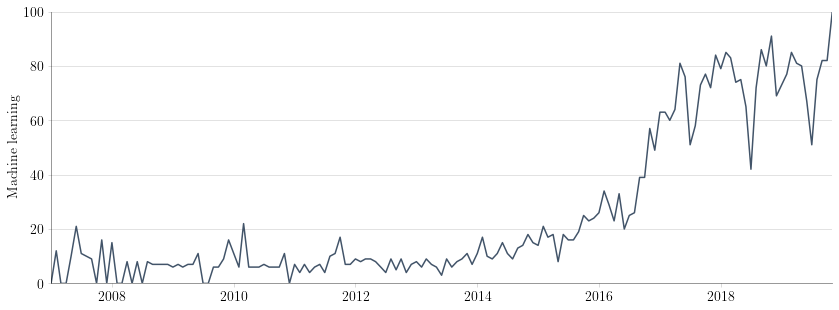

In [15]:
fig, ax = plt.subplots(figsize = (14,5))
#CAPITAL
# ax.plot((df_DK[['target_actual', 'date']][df_DK['ID']=='Capital'].set_index('date')), color = color_rgb[0], label = 'Capital',
#        linewidth = linewidth)
# ax.plot(temp[0])
color_ue = color_rgb[0]


ax.plot((df[(df['date']>=pd.Timestamp('2007-01-01'))].set_index('date')['"machine learning"']), color = color_ue, linewidth = linewidth)
ax.set_ylabel('Machine learning')

#Fixing box and grids
ax.grid(b = True, axis ='y', alpha=0.45)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.spines['left'].set_alpha(0.5)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', color = 'lightgrey')
ax.tick_params(axis='y', color = 'lightgrey')

ax.set_xlim(pd.Timestamp('2007-01-01') ,df['date'].max())
ax.set_ylim((0,100))

#Exporting
plt.savefig("report/3_processing/3_GT_example.pdf", bbox_inches='tight', encoding='utf-8-sig')
plt.show()

## Plots w/ Jobindex

### Absolute job levels

In [43]:
df_jobs = pd.read_csv('data/df_jobposts_DK.csv', parse_dates=['date'])

#september data
temp = pd.read_csv('data/df_DK_jobposts_sep.csv', parse_dates=['date'])

#Removiing last period
df_jobs = df_jobs[df_jobs['date'] != df_jobs['date'].max()].copy()

df_jobs = pd.concat([df_jobs, temp], ignore_index=True, sort = False).sort_values(['ID', 'date'])

#Only 2007 and onwards
df_jobs = df_jobs[df_jobs['date']>=pd.Timestamp('2007-02-01')].copy()

#### Counts of job posts across regions stacked

In [44]:
df_DK.groupby('ID')['pop'].mean()/df_DK.groupby('ID')['pop'].mean().sum()*100

ID
Capital             30.889755
Central Denmark     22.670760
North Denmark       10.356783
Southern Denmark    21.441873
Zealand             14.640828
Name: pop, dtype: float64

In [45]:
df_jobs.groupby('ID')['jobs'].mean()/df_jobs.groupby('ID')['jobs'].mean().sum()*100

ID
Capital             41.161165
Central Denmark     21.770142
North Denmark        7.919314
Southern Denmark    18.956833
Zealand             10.192547
Name: jobs, dtype: float64

In [46]:
color_rgb = [(0.26, 0.33, 0.41), (0.00, 0.47, 0.53),(0.717, 0.760, 0.819),  (0.13, 0.50, 0.36), (0.54, 0.23, 0.23)]
#color_rgb = [(0.26, 0.33, 0.41), (0.33, 0.33, 0.33), (0.00, 0.47, 0.53), (0.13, 0.50, 0.36), (0.54, 0.23, 0.23)]

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


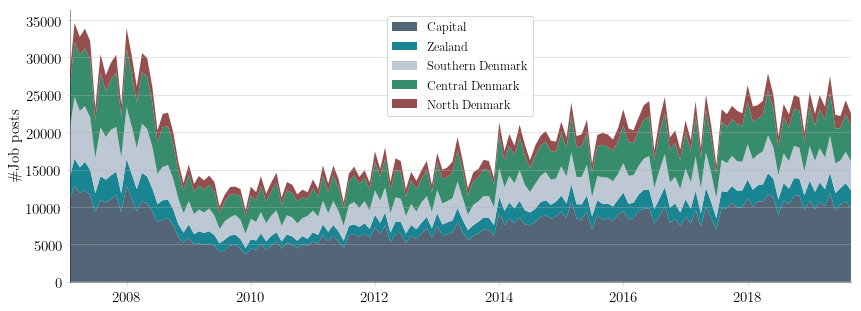

In [47]:
fig, ax = plt.subplots(figsize = (14,5))

ax.stackplot(df_jobs['date'].unique(), df_jobs[df_jobs['ID']=='Capital']['jobs'], df_jobs[df_jobs['ID']=='Zealand']['jobs'],
             df_jobs[df_jobs['ID']=='Southern Denmark']['jobs'], df_jobs[df_jobs['ID']=='Central Denmark']['jobs'], df_jobs[df_jobs['ID']=='North Denmark']['jobs'],
             colors = color_rgb, labels =['Capital', 'Zealand', 'Southern Denmark', 'Central Denmark','North Denmark'], alpha = 0.9)

ax.set_ylabel('\#Job posts')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.spines['left'].set_alpha(0.5)
ax.tick_params(axis='x', color = 'lightgrey')
ax.tick_params(axis='y', color = 'lightgrey')
ax.legend(loc = 'upper center', fontsize='small')
ax.grid(b = True, axis ='y', alpha=0.45)

ax.set_xlim(df_jobs['date'].min() ,df_jobs['date'].max())


#Exporting
plt.savefig("report/4_data/4_jobs_regions_stacked.pdf", bbox_inches='tight', encoding='utf-8-sig')
plt.show()

#### Sector share of total jobs distribution pie chart?

In [119]:
df_jobs.columns

Index(['date', 'jobs', 'ID', 'labour_force', 'sector_information_technology',
       'sector_engineering_technology', 'sector_management_staff',
       'sector_trade_service', 'sector_industry_craft',
       'sector_sales_communication', 'sector_teaching',
       'sector_office_finance', 'sector_social_health', 'sector_other',
       'sector_total'],
      dtype='object')

In [120]:
sector_list =  ['sector_information_technology',
       'sector_engineering_technology', 'sector_management_staff',
       'sector_trade_service', 'sector_industry_craft',
       'sector_sales_communication', 'sector_teaching',
       'sector_office_finance', 'sector_social_health', 'sector_other']

In [121]:
df_jobs['sector_total'] = df_jobs[sector_list].sum(axis=1)

In [122]:
sector_list.append('sector_total')
temp = df_jobs.groupby('date')[sector_list].sum().reset_index().copy()

In [123]:
sector_list =  ['sector_information_technology',
       'sector_engineering_technology', 'sector_management_staff',
       'sector_trade_service', 'sector_industry_craft',
       'sector_sales_communication', 'sector_teaching',
       'sector_office_finance', 'sector_social_health', 'sector_other']

In [124]:
for i in sector_list:
    temp[i+'_share'] = round((temp[i] / temp['sector_total'])*100,1)

In [125]:
pie = temp[[i+'_share' for i in sector_list]].mean().round(1).copy()

In [126]:
pie.sort_values(inplace = True)

In [127]:
new = [(str(x) +' %') for x in pie]

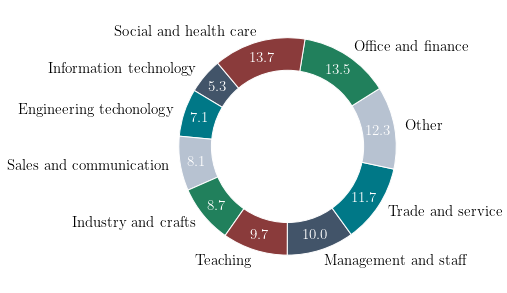

In [128]:
labels = ['Information technology', 'Engineering techonology', 'Sales and communication','Industry and crafts',
           'Teaching', 'Management and staff', 'Trade and service', 'Other',
         'Office and finance', 'Social and health care']

fig, ax = plt.subplots(figsize = (10,5))

# def test(l, i):
#     return str(round(l[i],1)

piechart = ax.pie(pie, labels = labels, autopct = '%.1f', pctdistance = 0.85, startangle = 130, colors = color_rgb)

for pie_wedge in piechart[0]:
    pie_wedge.set_edgecolor('white')

for autotext in piechart[2]:
    autotext.set_color('white')

my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

#Exporting
plt.savefig("report/4_data/4_sector_share.pdf", bbox_inches='tight', encoding='utf-8-sig')
plt.show()

#### Sector distribution 100 percent stacked over time

### 5 grid w/ Jobs

In [129]:
GT = 'jobs'
ylabel = 'Unemployment rate, \%'


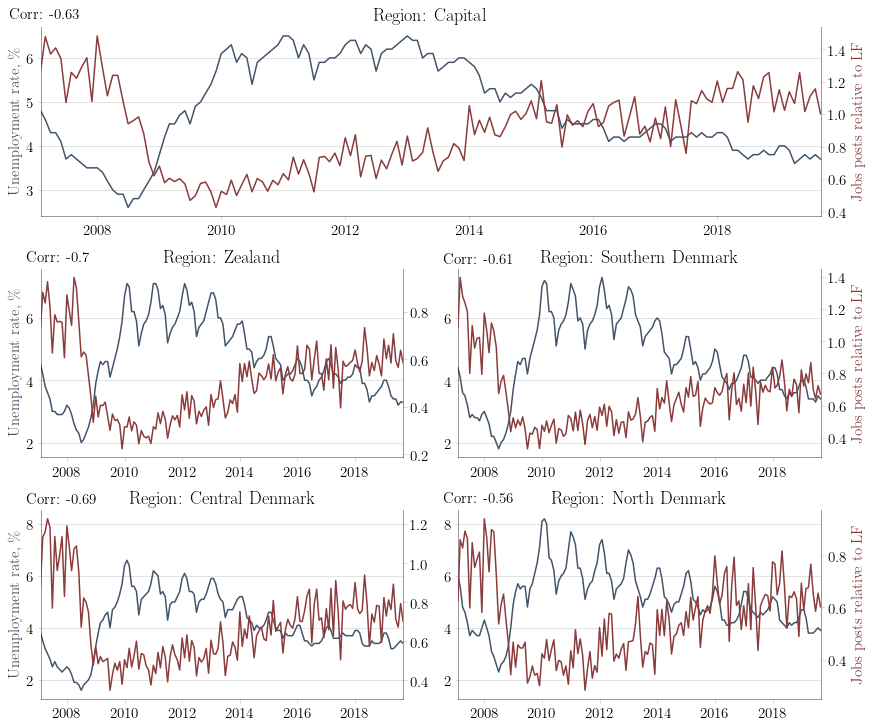

In [139]:
#Initilising entire fig and placements
fig = plt.figure(figsize=(12,10), constrained_layout = True)
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, :])

ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1], sharey = ax2)
# plt.setp(ax3.get_yticklabels(), visible=False)

ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1], sharey = ax4)
# plt.setp(ax5.get_yticklabels(), visible=False)

#SETTINGS
color_ue = color_rgb[0]
color_gt = color_rgb[-1]
ylabel2 = 'Jobs posts relative to LF'

    #CAPITAL
geo = 'Capital'
ax1.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax1.set_ylabel(ylabel, color = color_ue)

ax1_GT = ax1.twinx()
ax1_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax1_GT.set_ylabel(ylabel2, color = color_gt)

ax1.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.06,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 
plt.title('Region: ' + geo)

#Fixing box and grids
ax1.grid(b = True, axis ='y', alpha=0.45)

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_alpha(0.5)
ax1.spines['left'].set_alpha(0.5)
ax1.spines['right'].set_visible(False)

ax1.tick_params(axis='x', color = 'lightgrey')
ax1.tick_params(axis='y', color = 'lightgrey')
ax1_GT.tick_params(axis='y', color = 'lightgrey')

ax1_GT.spines['top'].set_visible(False)
ax1_GT.spines['bottom'].set_visible(False)
ax1_GT.spines['left'].set_visible(False)
ax1_GT.spines['right'].set_alpha(0.5)


    #ZEALAND
geo = 'Zealand'
ax2.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax2.set_ylabel(ylabel, color = color_ue)

ax2_GT = ax2.twinx()
ax2_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
#ax2_GT.set_ylabel(ylabel2, color = color_gt)

ax2.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.1 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax2.grid(b = True, axis ='y', alpha=0.45)

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_alpha(0.5)
ax2.spines['left'].set_alpha(0.5)
ax2.spines['right'].set_visible(False)

ax2.tick_params(axis='x', color = 'lightgrey')
ax2.tick_params(axis='y', color = 'lightgrey')
ax2_GT.tick_params(axis='y', color = 'lightgrey')

ax2_GT.spines['top'].set_visible(False)
ax2_GT.spines['bottom'].set_visible(False)
ax2_GT.spines['left'].set_visible(False)
ax2_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #South
geo = 'Southern Denmark'
ax3.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
#ax3.set_ylabel(ylabel, color = color_ue)

ax3_GT = ax3.twinx()
ax3_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax3_GT.set_ylabel(ylabel2, color = color_gt)

ax3.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.06 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax3.grid(b = True, axis ='y', alpha=0.45)

ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_alpha(0.5)
ax3.spines['left'].set_alpha(0.5)
ax3.spines['right'].set_visible(False)

ax3.tick_params(axis='x', color = 'lightgrey')
ax3.tick_params(axis='y', color = 'lightgrey')
ax3_GT.tick_params(axis='y', color = 'lightgrey')

ax3_GT.spines['top'].set_visible(False)
ax3_GT.spines['bottom'].set_visible(False)
ax3_GT.spines['left'].set_visible(False)
ax3_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #CENTRAL
geo = 'Central Denmark'
ax4.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax4.set_ylabel(ylabel, color = color_ue)

ax4_GT = ax4.twinx()
ax4_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
#ax4_GT.set_ylabel(ylabel2, color = color_gt)

ax4.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.33 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax4.grid(b = True, axis ='y', alpha=0.45)

ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_alpha(0.5)
ax4.spines['left'].set_alpha(0.5)
ax4.spines['right'].set_visible(False)

ax4.tick_params(axis='x', color = 'lightgrey')
ax4.tick_params(axis='y', color = 'lightgrey')
ax4_GT.tick_params(axis='y', color = 'lightgrey')

ax4_GT.spines['top'].set_visible(False)
ax4_GT.spines['bottom'].set_visible(False)
ax4_GT.spines['left'].set_visible(False)
ax4_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)

    #NORTH
geo = 'North Denmark'
ax5.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
#ax5.set_ylabel(ylabel, color = color_ue)

ax5_GT = ax5.twinx()
ax5_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax5_GT.set_ylabel(ylabel2, color = color_gt)

ax5.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.075 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax5.grid(b = True, axis ='y', alpha=0.45)

ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_alpha(0.5)
ax5.spines['left'].set_alpha(0.5)
ax5.spines['right'].set_visible(False)

ax5.tick_params(axis='x', color = 'lightgrey')
ax5.tick_params(axis='y', color = 'lightgrey')
ax5_GT.tick_params(axis='y', color = 'lightgrey')

ax5_GT.spines['top'].set_visible(False)
ax5_GT.spines['bottom'].set_visible(False)
ax5_GT.spines['left'].set_visible(False)
ax5_GT.spines['right'].set_alpha(0.5)

ax1_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax2_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax3_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax4_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax5_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())

plt.title('Region: ' + geo)

#Exporting
plt.savefig("report/4_data/4_ue_grid_jobs.pdf", bbox_inches='tight', encoding='utf-8-sig')
plt.show()

### 5 grid - Sector: Industry-craft

In [203]:
GT = 'sector_industry_craft'
ylabel = 'Unemployment rate (\%)'

/anaconda3/lib/python3.7/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  warnings.warn('constrained_layout not applied.  At least '
/anaconda3/lib/python3.7/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  warnings.warn('constrained_layout not applied.  At least '
/anaconda3/lib/python3.7/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  warnings.warn('constrained_layout not applied.  At least '


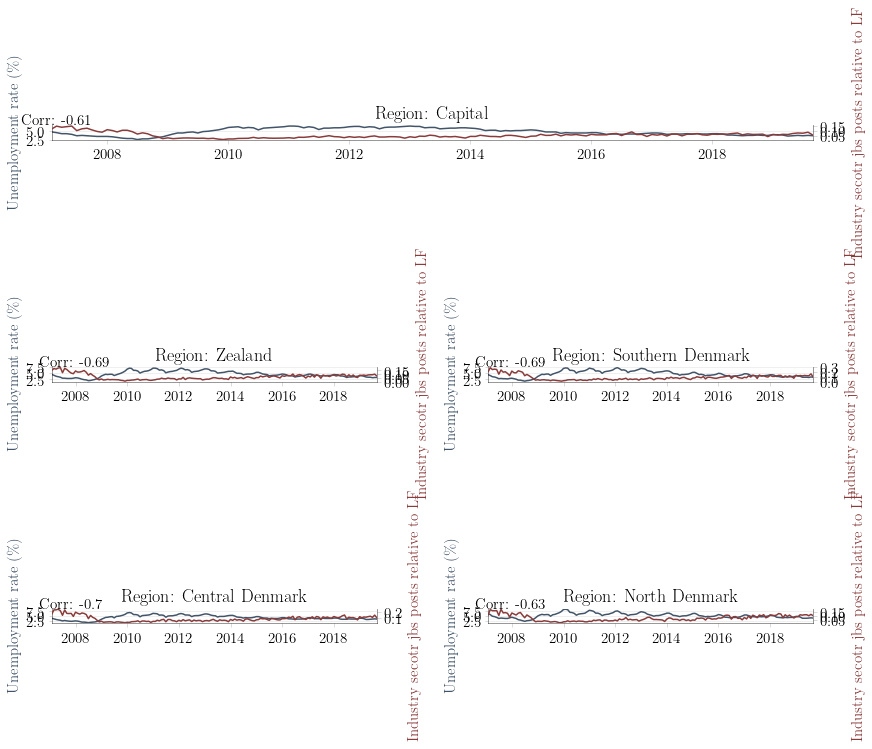

In [204]:
#Initilising entire fig and placements
fig = plt.figure(figsize=(12,10), constrained_layout = True)
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, :])

ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1], sharey = ax2)
# plt.setp(ax3.get_yticklabels(), visible=False)

ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1], sharey = ax4)
# plt.setp(ax5.get_yticklabels(), visible=False)

#SETTINGS
color_ue = color_rgb[0]
color_gt = color_rgb[-1]
ylabel2 = 'Industry secotr jbs posts relative to LF'

    #CAPITAL
geo = 'Capital'
ax1.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax1.set_ylabel(ylabel, color = color_ue)

ax1_GT = ax1.twinx()
ax1_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax1_GT.set_ylabel(ylabel2, color = color_gt)

ax1.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.05 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 
plt.title('Region: ' + geo)

#Fixing box and grids
ax1.grid(b = True, axis ='y', alpha=0.25)

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_alpha(0.5)
ax1.spines['left'].set_alpha(0.5)
ax1.spines['right'].set_visible(False)

ax1.tick_params(axis='x', color = 'lightgrey')
ax1.tick_params(axis='y', color = 'lightgrey')
ax1_GT.tick_params(axis='y', color = 'lightgrey')

ax1_GT.spines['top'].set_visible(False)
ax1_GT.spines['bottom'].set_visible(False)
ax1_GT.spines['left'].set_visible(False)
ax1_GT.spines['right'].set_alpha(0.5)


    #ZEALAND
geo = 'Zealand'
ax2.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax2.set_ylabel(ylabel, color = color_ue)

ax2_GT = ax2.twinx()
ax2_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax2_GT.set_ylabel(ylabel2, color = color_gt)

ax2.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.05 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax2.grid(b = True, axis ='y', alpha=0.25)

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_alpha(0.5)
ax2.spines['left'].set_alpha(0.5)
ax2.spines['right'].set_visible(False)

ax2.tick_params(axis='x', color = 'lightgrey')
ax2.tick_params(axis='y', color = 'lightgrey')
ax2_GT.tick_params(axis='y', color = 'lightgrey')

ax2_GT.spines['top'].set_visible(False)
ax2_GT.spines['bottom'].set_visible(False)
ax2_GT.spines['left'].set_visible(False)
ax2_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #South
geo = 'Southern Denmark'
ax3.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax3.set_ylabel(ylabel, color = color_ue)

ax3_GT = ax3.twinx()
ax3_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax3_GT.set_ylabel(ylabel2, color = color_gt)

ax3.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.05 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax3.grid(b = True, axis ='y', alpha=0.25)

ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_alpha(0.5)
ax3.spines['left'].set_alpha(0.5)
ax3.spines['right'].set_visible(False)

ax3.tick_params(axis='x', color = 'lightgrey')
ax3.tick_params(axis='y', color = 'lightgrey')
ax3_GT.tick_params(axis='y', color = 'lightgrey')

ax3_GT.spines['top'].set_visible(False)
ax3_GT.spines['bottom'].set_visible(False)
ax3_GT.spines['left'].set_visible(False)
ax3_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #CENTRAL
geo = 'Central Denmark'
ax4.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax4.set_ylabel(ylabel, color = color_ue)

ax4_GT = ax4.twinx()
ax4_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax4_GT.set_ylabel(ylabel2, color = color_gt)

ax4.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.25 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax4.grid(b = True, axis ='y', alpha=0.25)

ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_alpha(0.5)
ax4.spines['left'].set_alpha(0.5)
ax4.spines['right'].set_visible(False)

ax4.tick_params(axis='x', color = 'lightgrey')
ax4.tick_params(axis='y', color = 'lightgrey')
ax4_GT.tick_params(axis='y', color = 'lightgrey')

ax4_GT.spines['top'].set_visible(False)
ax4_GT.spines['bottom'].set_visible(False)
ax4_GT.spines['left'].set_visible(False)
ax4_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)

    #NORTH
geo = 'North Denmark'
ax5.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax5.set_ylabel(ylabel, color = color_ue)

ax5_GT = ax5.twinx()
ax5_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax5_GT.set_ylabel(ylabel2, color = color_gt)

ax5.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.05 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax5.grid(b = True, axis ='y', alpha=0.25)

ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_alpha(0.5)
ax5.spines['left'].set_alpha(0.5)
ax5.spines['right'].set_visible(False)

ax5.tick_params(axis='x', color = 'lightgrey')
ax5.tick_params(axis='y', color = 'lightgrey')
ax5_GT.tick_params(axis='y', color = 'lightgrey')

ax5_GT.spines['top'].set_visible(False)
ax5_GT.spines['bottom'].set_visible(False)
ax5_GT.spines['left'].set_visible(False)
ax5_GT.spines['right'].set_alpha(0.5)

ax1_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax2_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax3_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax4_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax5_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())

plt.title('Region: ' + geo)

#Exporting
plt.savefig("report/4_data/4_ue_grid_sector_industry.pdf", bbox_inches='tight', encoding='utf-8-sig')
plt.show()

### 5 grid w/ Jobs - 3 month lag

In [13]:
#3 month lag
columns_3m_lag = ['jobs', 'sector_information_technology', 'sector_engineering_technology',
                   'sector_management_staff', 'sector_trade_service', 'sector_industry_craft',
                   'sector_teaching', 'sector_office_finance', 'sector_social_health']
for colname in columns_3m_lag:
    df_DK[str(colname + '_3_lag')] = df_DK.groupby(['ID'])[colname].shift(3)

In [27]:
GT = 'jobs_3_lag'
ylabel = 'Unemployment rate,\%'

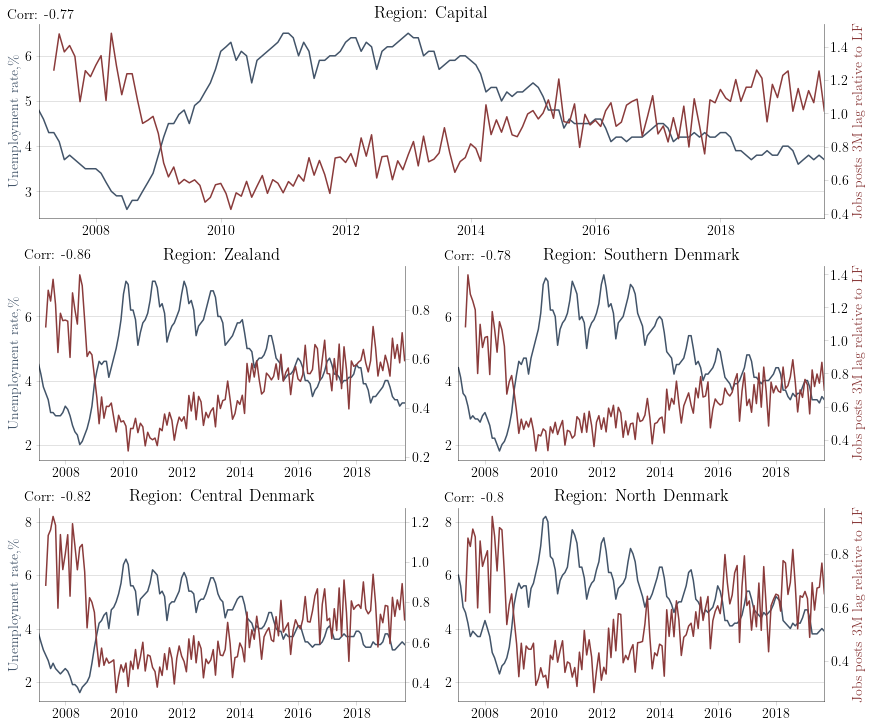

In [28]:
#Initilising entire fig and placements
fig = plt.figure(figsize=(12,10), constrained_layout = True)
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, :])

ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1], sharey = ax2)
# plt.setp(ax3.get_yticklabels(), visible=False)

ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1], sharey = ax4)
# plt.setp(ax5.get_yticklabels(), visible=False)

#SETTINGS
color_ue = color_rgb[0]
color_gt = color_rgb[-1]
ylabel2 = 'Jobs posts 3M lag relative to LF'

    #CAPITAL
geo = 'Capital'
ax1.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax1.set_ylabel(ylabel, color = color_ue)

ax1_GT = ax1.twinx()
ax1_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax1_GT.set_ylabel(ylabel2, color = color_gt)

ax1.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.05 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 
plt.title('Region: ' + geo)

#Fixing box and grids
ax1.grid(b = True, axis ='y', alpha=0.45)

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_alpha(0.5)
ax1.spines['left'].set_alpha(0.5)
ax1.spines['right'].set_visible(False)

ax1.tick_params(axis='x', color = 'lightgrey')
ax1.tick_params(axis='y', color = 'lightgrey')
ax1_GT.tick_params(axis='y', color = 'lightgrey')

ax1_GT.spines['top'].set_visible(False)
ax1_GT.spines['bottom'].set_visible(False)
ax1_GT.spines['left'].set_visible(False)
ax1_GT.spines['right'].set_alpha(0.5)


    #ZEALAND
geo = 'Zealand'
ax2.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax2.set_ylabel(ylabel, color = color_ue)

ax2_GT = ax2.twinx()
ax2_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
#ax2_GT.set_ylabel(ylabel2, color = color_gt)

ax2.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.1 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax2.grid(b = True, axis ='y', alpha=0.45)

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_alpha(0.5)
ax2.spines['left'].set_alpha(0.5)
ax2.spines['right'].set_visible(False)

ax2.tick_params(axis='x', color = 'lightgrey')
ax2.tick_params(axis='y', color = 'lightgrey')
ax2_GT.tick_params(axis='y', color = 'lightgrey')

ax2_GT.spines['top'].set_visible(False)
ax2_GT.spines['bottom'].set_visible(False)
ax2_GT.spines['left'].set_visible(False)
ax2_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #South
geo = 'Southern Denmark'
ax3.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
#ax3.set_ylabel(ylabel, color = color_ue)

ax3_GT = ax3.twinx()
ax3_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax3_GT.set_ylabel(ylabel2, color = color_gt)

ax3.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.0658 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax3.grid(b = True, axis ='y', alpha=0.45)

ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_alpha(0.5)
ax3.spines['left'].set_alpha(0.5)
ax3.spines['right'].set_visible(False)

ax3.tick_params(axis='x', color = 'lightgrey')
ax3.tick_params(axis='y', color = 'lightgrey')
ax3_GT.tick_params(axis='y', color = 'lightgrey')

ax3_GT.spines['top'].set_visible(False)
ax3_GT.spines['bottom'].set_visible(False)
ax3_GT.spines['left'].set_visible(False)
ax3_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #CENTRAL
geo = 'Central Denmark'
ax4.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax4.set_ylabel(ylabel, color = color_ue)

ax4_GT = ax4.twinx()
ax4_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
#ax4_GT.set_ylabel(ylabel2, color = color_gt)

ax4.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.335,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax4.grid(b = True, axis ='y', alpha=0.45)

ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_alpha(0.5)
ax4.spines['left'].set_alpha(0.5)
ax4.spines['right'].set_visible(False)

ax4.tick_params(axis='x', color = 'lightgrey')
ax4.tick_params(axis='y', color = 'lightgrey')
ax4_GT.tick_params(axis='y', color = 'lightgrey')

ax4_GT.spines['top'].set_visible(False)
ax4_GT.spines['bottom'].set_visible(False)
ax4_GT.spines['left'].set_visible(False)
ax4_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)

    #NORTH
geo = 'North Denmark'
ax5.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
#ax5.set_ylabel(ylabel, color = color_ue)

ax5_GT = ax5.twinx()
ax5_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax5_GT.set_ylabel(ylabel2, color = color_gt)

ax5.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.07 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax5.grid(b = True, axis ='y', alpha=0.45)

ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_alpha(0.5)
ax5.spines['left'].set_alpha(0.5)
ax5.spines['right'].set_visible(False)

ax5.tick_params(axis='x', color = 'lightgrey')
ax5.tick_params(axis='y', color = 'lightgrey')
ax5_GT.tick_params(axis='y', color = 'lightgrey')

ax5_GT.spines['top'].set_visible(False)
ax5_GT.spines['bottom'].set_visible(False)
ax5_GT.spines['left'].set_visible(False)
ax5_GT.spines['right'].set_alpha(0.5)

ax1_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax2_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax3_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax4_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax5_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())

plt.title('Region: ' + geo)

#Exporting
plt.savefig("report/4_data/4_ue_grid_jobs_3Mlag.pdf", bbox_inches='tight', encoding='utf-8-sig')
plt.show()

### 5 grid w/ sector:INDUSTRY - 3 month lag

In [73]:
GT = 'sector_industry_craft_3_lag'
ylabel = 'Unemployment rate (\%)'

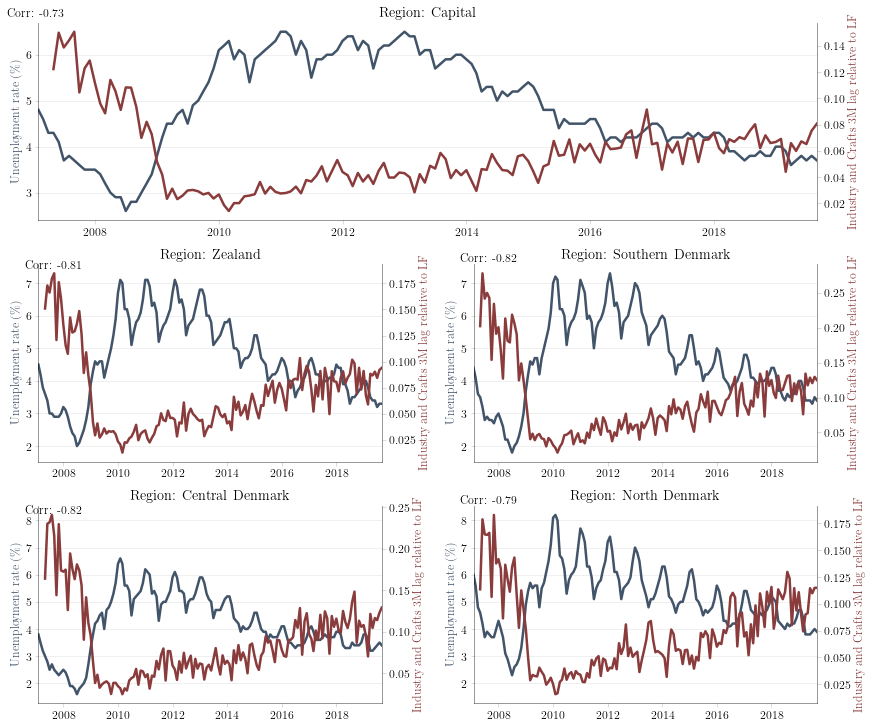

In [75]:
#Initilising entire fig and placements
fig = plt.figure(figsize=(12,10), constrained_layout = True)
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, :])

ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1], sharey = ax2)
# plt.setp(ax3.get_yticklabels(), visible=False)

ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1], sharey = ax4)
# plt.setp(ax5.get_yticklabels(), visible=False)

#SETTINGS
color_ue = color_rgb[0]
color_gt = color_rgb[-1]
ylabel2 = 'Industry and Crafts 3M lag relative to LF'

    #CAPITAL
geo = 'Capital'
ax1.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax1.set_ylabel(ylabel, color = color_ue)

ax1_GT = ax1.twinx()
ax1_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax1_GT.set_ylabel(ylabel2, color = color_gt)

ax1.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.05 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 
plt.title('Region: ' + geo)

#Fixing box and grids
ax1.grid(b = True, axis ='y', alpha=0.25)

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_alpha(0.5)
ax1.spines['left'].set_alpha(0.5)
ax1.spines['right'].set_visible(False)

ax1.tick_params(axis='x', color = 'lightgrey')
ax1.tick_params(axis='y', color = 'lightgrey')
ax1_GT.tick_params(axis='y', color = 'lightgrey')

ax1_GT.spines['top'].set_visible(False)
ax1_GT.spines['bottom'].set_visible(False)
ax1_GT.spines['left'].set_visible(False)
ax1_GT.spines['right'].set_alpha(0.5)


    #ZEALAND
geo = 'Zealand'
ax2.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax2.set_ylabel(ylabel, color = color_ue)

ax2_GT = ax2.twinx()
ax2_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax2_GT.set_ylabel(ylabel2, color = color_gt)

ax2.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.05 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax2.grid(b = True, axis ='y', alpha=0.25)

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_alpha(0.5)
ax2.spines['left'].set_alpha(0.5)
ax2.spines['right'].set_visible(False)

ax2.tick_params(axis='x', color = 'lightgrey')
ax2.tick_params(axis='y', color = 'lightgrey')
ax2_GT.tick_params(axis='y', color = 'lightgrey')

ax2_GT.spines['top'].set_visible(False)
ax2_GT.spines['bottom'].set_visible(False)
ax2_GT.spines['left'].set_visible(False)
ax2_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #South
geo = 'Southern Denmark'
ax3.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax3.set_ylabel(ylabel, color = color_ue)

ax3_GT = ax3.twinx()
ax3_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax3_GT.set_ylabel(ylabel2, color = color_gt)

ax3.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.05 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax3.grid(b = True, axis ='y', alpha=0.25)

ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_alpha(0.5)
ax3.spines['left'].set_alpha(0.5)
ax3.spines['right'].set_visible(False)

ax3.tick_params(axis='x', color = 'lightgrey')
ax3.tick_params(axis='y', color = 'lightgrey')
ax3_GT.tick_params(axis='y', color = 'lightgrey')

ax3_GT.spines['top'].set_visible(False)
ax3_GT.spines['bottom'].set_visible(False)
ax3_GT.spines['left'].set_visible(False)
ax3_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)


    #CENTRAL
geo = 'Central Denmark'
ax4.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax4.set_ylabel(ylabel, color = color_ue)

ax4_GT = ax4.twinx()
ax4_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax4_GT.set_ylabel(ylabel2, color = color_gt)

ax4.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.25 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax4.grid(b = True, axis ='y', alpha=0.25)

ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_alpha(0.5)
ax4.spines['left'].set_alpha(0.5)
ax4.spines['right'].set_visible(False)

ax4.tick_params(axis='x', color = 'lightgrey')
ax4.tick_params(axis='y', color = 'lightgrey')
ax4_GT.tick_params(axis='y', color = 'lightgrey')

ax4_GT.spines['top'].set_visible(False)
ax4_GT.spines['bottom'].set_visible(False)
ax4_GT.spines['left'].set_visible(False)
ax4_GT.spines['right'].set_alpha(0.5)

plt.title('Region: ' + geo)

    #NORTH
geo = 'North Denmark'
ax5.plot((df_DK[['target_actual', 'date']][df_DK['ID']==geo].set_index('date')), color = color_ue, linewidth = linewidth)
ax5.set_ylabel(ylabel, color = color_ue)

ax5_GT = ax5.twinx()
ax5_GT.plot((df_DK[[GT, 'date']][df_DK['ID']==geo].set_index('date')), color = color_gt, linewidth = linewidth)
ax5_GT.set_ylabel(ylabel2, color = color_gt)

ax5.text(x = pd.Timestamp("2006-08-01"), y = df_DK[['target_actual', 'date']][df_DK['ID']==geo]['target_actual'].max()*1.05 ,
                    s = 'Corr: ' + str(round(df_DK[['target_actual', GT]][df_DK['ID']==geo].corr()['target_actual'][1], 2))) 

#Fixing box and grids
ax5.grid(b = True, axis ='y', alpha=0.25)

ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_alpha(0.5)
ax5.spines['left'].set_alpha(0.5)
ax5.spines['right'].set_visible(False)

ax5.tick_params(axis='x', color = 'lightgrey')
ax5.tick_params(axis='y', color = 'lightgrey')
ax5_GT.tick_params(axis='y', color = 'lightgrey')

ax5_GT.spines['top'].set_visible(False)
ax5_GT.spines['bottom'].set_visible(False)
ax5_GT.spines['left'].set_visible(False)
ax5_GT.spines['right'].set_alpha(0.5)

ax1_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax2_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax3_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax4_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())
ax5_GT.set_xlim(df_DK['date'].min() ,df_DK['date'].max())

plt.title('Region: ' + geo)

#Exporting
plt.savefig("report/4_data/4_ue_grid_sectorindustry_3Mlag.pdf", bbox_inches='tight', encoding='utf-8-sig')
plt.show()

## Regional maps

In [ ]:
df_DK = pd.read_csv('data/df_DK.csv', parse_dates=['date'])

#To match geojson
df_DK = pd.merge(df_DK, global_id('DK')[['ID', 'target#long']], on = 'ID', how = 'left')
df_DK['target#long'] = df_DK['target#long'].astype(str)

In [ ]:
#Geojson data
regioner_path = 'data/regioner.geojson'
regioner = gpd.read_file(regioner_path)

### AVERAGE UE

In [ ]:
temp = df_DK.groupby(['target#long'])['target_actual'].mean().reset_index()
# temp = df_DK[df_DK['date'] == df_DK['date'].max()][['target#long', 'target_actual']]

In [ ]:
regioner = pd.merge(regioner, temp, how = 'left', right_on = 'target#long', left_on = 'REGIONKODE')

In [ ]:
regioner.plot()

<font color = red> Figure out how to move Bornholm???

Add and subtract relevant value for coordinate with ~15?

In [ ]:
global_id('DK')[['ID', 'target#long']]

In [ ]:
temp

In [ ]:
temp[temp['target#long']=='1081']['target_actual'][0]

In [ ]:
temp[temp['target#long']=='1083']['target_actual']

In [ ]:
#initiliating matplot lib
# vmin, vmax = 120, 220
fig, ax = plt.subplots(1, 1, figsize=(20,5))
ax = regioner.plot(column = 'target_actual', cmap = 'Blues', edgecolor = 'darkgrey', linewidth=0.5,
                   ax = ax, legend = False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

#Adding values
#NORTH
ax.text(x = 9.6, y = 56.9, fontsize = 8,
       s = 'North Denmark:\n ' + str(temp[temp['target#long']=='1081']['target_actual'][0].round(1)),
        color = 'white',
        ha="center", va="center", bbox=dict(boxstyle="round", color='darkgrey', alpha=0.85))
#CENTRAL
ax.text(x = 9.6, y = 56.9, fontsize = 8,
       s = 'Central Denmark:\n ' + str('hej'),
        color = 'white',
        ha="center", va="center", bbox=dict(boxstyle="round", color='darkgrey', alpha=0.85))
#SOUTH
ax.text(x = 9.6, y = 56.9, fontsize = 8,
       s = 'South Denmark:\n ' + str('hej'),
        color = 'white',
        ha="center", va="center", bbox=dict(boxstyle="round", color='darkgrey', alpha=0.85))
#CAPITAL
ax.text(x = 9.6, y = 56.9, fontsize = 8,
       s = 'Capital:\n ' + str('hej'),
        color = 'white',
        ha="center", va="center", bbox=dict(boxstyle="round", color='darkgrey', alpha=0.85))
#ZEALAND
ax.text(x = 9.6, y = 56.9, fontsize = 8,
       s = 'Zealand:\n ' + str('hej'),
        color = 'white',
        ha="center", va="center", bbox=dict(boxstyle="round", color='darkgrey', alpha=0.85))

#Exporting
plt.savefig("report/4_data/ue_map_avg20072019.pdf", bbox_inches='tight', encoding='utf-8-sig')
plt.show()

In [ ]:
#initiliating matplot lib
# vmin, vmax = 120, 220
fig, ax = plt.subplots(1, 1, figsize=(20,5))
ax = regioner.plot(column = 'target_actual', cmap = 'Blues', edgecolor = 'darkgrey', ax = ax, legend = True)
ax.set_axis_off()
# sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin = regioner['target_actual'].min(), vmax = regioner['target_actual'].max()))
# empty array for the data range
# sm._A = []
# add the colorbar to the figure
# cbar = fig.colorbar(sm)
plt.show()

In [ ]:
# regioner.plot(column = 'target_actual', cmap = 'Blues', figsize = (20,10), edgecolor = 'darkgrey')